# 使用全链接神经网络进行训练

## 1 导入数据

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("../../kaggle/LosAngelesHousePricesForecast/data/train_1.csv")
if 'Unnamed: 0' in train.columns: 
    train = train.drop(['Unnamed: 0'], axis=1)
y = train["SalePrice"]
train1 = train.drop(["Id", "SalePrice"], axis=1)
X = pd.get_dummies(train1).reset_index(drop=True)
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state = 123)   

In [3]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


### 评估函数

In [4]:
def benchmark(model):
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    logrmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(pred)))
    print("RMSE: {} \nLOGRMSE: {}".format(rmse, logrmse))
    return rmse, logrmse

## 2 模型训练

In [5]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Using TensorFlow backend.


In [6]:
keras.__version__

'2.2.4'

In [7]:
tf.__version__

'1.12.0'

In [8]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(300,activation="relu")) 
    model.add(Dropout(0.2))
    model.add(Dense(50, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [9]:
model = KerasRegressor(build_fn=create_model)

In [10]:
batch_size = [16, 32, 48, 64, 80, 96]
epochs = [500, 1000, 2000, 3000, 3500, 4000]

param_grid = dict(batch_size=batch_size,epochs=epochs)
rscv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, verbose=0, n_jobs=-1,random_state=123)
result = rscv.fit(X_train, y_train)
for mean,stdev,param in zip(result.cv_results_['mean_test_score'],
                           result.cv_results_['std_test_score'],
                           result.cv_results_['params']):
    print("mean:{} stdev:{} param:{}".format(mean,stdev,param))
print("Best score: {} Best param:{}".format(result.best_score_, result.best_params_))

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/4000
1168/1168 [==============================] - 0s 309us/step - loss: 38260774182.5753
Epoch 2/4000
1168/1168 [==============================] - 0s 48us/step - loss: 25178963939.9452
Epoch 3/4000
1168/1168 [==============================] - 0s 48us/step - loss: 7336703210.9589
Epoch 4/4000
1168/1168 [==============================] - 0s 47us/step - loss: 5338016953.8630
Epoch 5/4000
1168/1168 [==============================] - 0s 48us/step - loss: 4558897320.3288
Epoch 6/4000
1168/1168 [==============================] - 0s 46us/step - loss: 4219703534.4658
Epoch 7/4000
1168/1168 [==============================] - 0s 47us/step - loss: 3876495042.6301
Epoch 8/4000
1168/1168 [==============================] - 0s 48us/step - loss: 3591904508.4932
Epoch 9/4000
1168/1168 [==============================] - 0s 47us/step - loss: 3386917418.0822
Epoch 10/4000
1168/1168 [==============================] - 0s 47us/step - loss: 3340189327.7808
Epoch 11/4000
1168/1168 [=====================

1168/1168 [==============================] - 0s 47us/step - loss: 1556491659.3973
Epoch 171/4000
1168/1168 [==============================] - 0s 46us/step - loss: 1490563181.5890
Epoch 172/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1624088781.1507
Epoch 173/4000
1168/1168 [==============================] - 0s 46us/step - loss: 1549887579.1781
Epoch 174/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1542618460.9315
Epoch 175/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1548788934.1370
Epoch 176/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1645297486.0274
Epoch 177/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1502818926.0274
Epoch 178/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1585637916.0548
Epoch 179/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1488404120.5479
Epoch 180/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 1054656022.7945
Epoch 339/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1036158240.4384
Epoch 340/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1042839715.5068
Epoch 341/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1025471412.8219
Epoch 342/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1048077391.7808
Epoch 343/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1063248487.4521
Epoch 344/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1045447370.5205
Epoch 345/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1075387679.5616
Epoch 346/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1033621081.4247
Epoch 347/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1115183715.9452
Epoch 348/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 48us/step - loss: 782504054.7945
Epoch 509/4000
1168/1168 [==============================] - 0s 47us/step - loss: 759579492.3836
Epoch 510/4000
1168/1168 [==============================] - 0s 48us/step - loss: 762219483.1781
Epoch 511/4000
1168/1168 [==============================] - 0s 47us/step - loss: 728562727.4521
Epoch 512/4000
1168/1168 [==============================] - 0s 48us/step - loss: 675734812.9315
Epoch 513/4000
1168/1168 [==============================] - 0s 48us/step - loss: 765019170.6301
Epoch 514/4000
1168/1168 [==============================] - 0s 46us/step - loss: 720177830.5753
Epoch 515/4000
1168/1168 [==============================] - 0s 47us/step - loss: 773700081.0959
Epoch 516/4000
1168/1168 [==============================] - 0s 48us/step - loss: 797208243.7260
Epoch 517/4000
1168/1168 [==============================] - 0s 50us/step - loss: 727518105.4247
Epoch 518/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 48us/step - loss: 683188113.5342
Epoch 679/4000
1168/1168 [==============================] - 0s 47us/step - loss: 547134647.2329
Epoch 680/4000
1168/1168 [==============================] - 0s 48us/step - loss: 569855697.9726
Epoch 681/4000
1168/1168 [==============================] - 0s 47us/step - loss: 532819824.2192
Epoch 682/4000
1168/1168 [==============================] - 0s 47us/step - loss: 615912948.1644
Epoch 683/4000
1168/1168 [==============================] - 0s 47us/step - loss: 603621621.0411
Epoch 684/4000
1168/1168 [==============================] - 0s 47us/step - loss: 721291864.9863
Epoch 685/4000
1168/1168 [==============================] - 0s 48us/step - loss: 602816762.7397
Epoch 686/4000
1168/1168 [==============================] - 0s 48us/step - loss: 626160764.9315
Epoch 687/4000
1168/1168 [==============================] - 0s 48us/step - loss: 576703075.5068
Epoch 688/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 47us/step - loss: 474653210.7397
Epoch 849/4000
1168/1168 [==============================] - 0s 47us/step - loss: 608328577.5342
Epoch 850/4000
1168/1168 [==============================] - 0s 48us/step - loss: 515959185.0959
Epoch 851/4000
1168/1168 [==============================] - 0s 49us/step - loss: 543005462.7945
Epoch 852/4000
1168/1168 [==============================] - 0s 47us/step - loss: 632673721.8630
Epoch 853/4000
1168/1168 [==============================] - 0s 48us/step - loss: 569413496.1096
Epoch 854/4000
1168/1168 [==============================] - 0s 47us/step - loss: 520157983.1233
Epoch 855/4000
1168/1168 [==============================] - 0s 50us/step - loss: 489850742.3562
Epoch 856/4000
1168/1168 [==============================] - 0s 48us/step - loss: 537082254.0274
Epoch 857/4000
1168/1168 [==============================] - 0s 47us/step - loss: 555648419.9452
Epoch 858/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 48us/step - loss: 445558321.9726
Epoch 1019/4000
1168/1168 [==============================] - 0s 48us/step - loss: 440757468.2740
Epoch 1020/4000
1168/1168 [==============================] - 0s 47us/step - loss: 458048431.3425
Epoch 1021/4000
1168/1168 [==============================] - 0s 48us/step - loss: 536254267.1781
Epoch 1022/4000
1168/1168 [==============================] - 0s 48us/step - loss: 463271011.9452
Epoch 1023/4000
1168/1168 [==============================] - 0s 48us/step - loss: 449433409.3151
Epoch 1024/4000
1168/1168 [==============================] - 0s 48us/step - loss: 444018269.3699
Epoch 1025/4000
1168/1168 [==============================] - 0s 47us/step - loss: 480941627.1781
Epoch 1026/4000
1168/1168 [==============================] - 0s 48us/step - loss: 454938934.3562
Epoch 1027/4000
1168/1168 [==============================] - 0s 48us/step - loss: 499355643.6164
Epoch 1028/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 46us/step - loss: 393741700.6027
Epoch 1187/4000
1168/1168 [==============================] - 0s 47us/step - loss: 419050417.5342
Epoch 1188/4000
1168/1168 [==============================] - 0s 47us/step - loss: 476992625.0959
Epoch 1189/4000
1168/1168 [==============================] - 0s 47us/step - loss: 453827618.6301
Epoch 1190/4000
1168/1168 [==============================] - 0s 47us/step - loss: 384915081.0959
Epoch 1191/4000
1168/1168 [==============================] - 0s 46us/step - loss: 406957992.3288
Epoch 1192/4000
1168/1168 [==============================] - 0s 47us/step - loss: 427285338.3014
Epoch 1193/4000
1168/1168 [==============================] - 0s 47us/step - loss: 470912056.3288
Epoch 1194/4000
1168/1168 [==============================] - 0s 46us/step - loss: 392688473.6438
Epoch 1195/4000
1168/1168 [==============================] - 0s 47us/step - loss: 422787034.3014
Epoch 1196/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 49us/step - loss: 352011104.0000
Epoch 1355/4000
1168/1168 [==============================] - 0s 47us/step - loss: 355039893.4795
Epoch 1356/4000
1168/1168 [==============================] - 0s 47us/step - loss: 376349997.1507
Epoch 1357/4000
1168/1168 [==============================] - 0s 45us/step - loss: 403048300.2740
Epoch 1358/4000
1168/1168 [==============================] - 0s 46us/step - loss: 404704152.1096
Epoch 1359/4000
1168/1168 [==============================] - 0s 45us/step - loss: 377553717.0411
Epoch 1360/4000
1168/1168 [==============================] - 0s 48us/step - loss: 432092772.3836
Epoch 1361/4000
1168/1168 [==============================] - 0s 47us/step - loss: 530710869.0411
Epoch 1362/4000
1168/1168 [==============================] - 0s 47us/step - loss: 382151373.1507
Epoch 1363/4000
1168/1168 [==============================] - 0s 45us/step - loss: 466099200.8767
Epoch 1364/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 368566492.9315
Epoch 1523/4000
1168/1168 [==============================] - 0s 48us/step - loss: 363281405.8082
Epoch 1524/4000
1168/1168 [==============================] - 0s 56us/step - loss: 352558509.3699
Epoch 1525/4000
1168/1168 [==============================] - 0s 52us/step - loss: 409691891.0685
Epoch 1526/4000
1168/1168 [==============================] - 0s 54us/step - loss: 379602268.4932
Epoch 1527/4000
1168/1168 [==============================] - 0s 48us/step - loss: 443813076.6027
Epoch 1528/4000
1168/1168 [==============================] - 0s 48us/step - loss: 478710305.3151
Epoch 1529/4000
1168/1168 [==============================] - 0s 48us/step - loss: 413123638.7945
Epoch 1530/4000
1168/1168 [==============================] - 0s 49us/step - loss: 335143851.6164
Epoch 1531/4000
1168/1168 [==============================] - 0s 48us/step - loss: 335985970.4110
Epoch 1532/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 359025439.4521
Epoch 1691/4000
1168/1168 [==============================] - 0s 48us/step - loss: 372209460.1644
Epoch 1692/4000
1168/1168 [==============================] - 0s 47us/step - loss: 376297553.9726
Epoch 1693/4000
1168/1168 [==============================] - 0s 48us/step - loss: 302736714.3014
Epoch 1694/4000
1168/1168 [==============================] - 0s 47us/step - loss: 344070849.3151
Epoch 1695/4000
1168/1168 [==============================] - 0s 46us/step - loss: 363286632.5479
Epoch 1696/4000
1168/1168 [==============================] - 0s 47us/step - loss: 350035528.9863
Epoch 1697/4000
1168/1168 [==============================] - 0s 46us/step - loss: 310260359.2329
Epoch 1698/4000
1168/1168 [==============================] - 0s 46us/step - loss: 320839000.9863
Epoch 1699/4000
1168/1168 [==============================] - 0s 47us/step - loss: 313079040.4384
Epoch 1700/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 325262343.4521
Epoch 1859/4000
1168/1168 [==============================] - 0s 50us/step - loss: 312582480.2192
Epoch 1860/4000
1168/1168 [==============================] - 0s 49us/step - loss: 336823805.8082
Epoch 1861/4000
1168/1168 [==============================] - 0s 48us/step - loss: 325308563.9452
Epoch 1862/4000
1168/1168 [==============================] - 0s 48us/step - loss: 312124195.2877
Epoch 1863/4000
1168/1168 [==============================] - 0s 48us/step - loss: 332553069.3699
Epoch 1864/4000
1168/1168 [==============================] - 0s 47us/step - loss: 297871299.5068
Epoch 1865/4000
1168/1168 [==============================] - 0s 47us/step - loss: 302463626.3014
Epoch 1866/4000
1168/1168 [==============================] - 0s 47us/step - loss: 325951077.9178
Epoch 1867/4000
1168/1168 [==============================] - 0s 48us/step - loss: 327154480.0000
Epoch 1868/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 45us/step - loss: 290235166.0274
Epoch 2027/4000
1168/1168 [==============================] - 0s 46us/step - loss: 314328247.6712
Epoch 2028/4000
1168/1168 [==============================] - 0s 47us/step - loss: 305449653.0411
Epoch 2029/4000
1168/1168 [==============================] - 0s 48us/step - loss: 291766044.0548
Epoch 2030/4000
1168/1168 [==============================] - 0s 48us/step - loss: 312883687.0137
Epoch 2031/4000
1168/1168 [==============================] - 0s 47us/step - loss: 307695106.1918
Epoch 2032/4000
1168/1168 [==============================] - 0s 46us/step - loss: 294863263.5616
Epoch 2033/4000
1168/1168 [==============================] - 0s 45us/step - loss: 337023623.1233
Epoch 2034/4000
1168/1168 [==============================] - 0s 46us/step - loss: 297579247.3425
Epoch 2035/4000
1168/1168 [==============================] - 0s 46us/step - loss: 328067466.5205
Epoch 2036/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 48us/step - loss: 274201257.8630
Epoch 2195/4000
1168/1168 [==============================] - 0s 47us/step - loss: 294638305.9726
Epoch 2196/4000
1168/1168 [==============================] - 0s 47us/step - loss: 288086869.0411
Epoch 2197/4000
1168/1168 [==============================] - 0s 49us/step - loss: 301476565.6986
Epoch 2198/4000
1168/1168 [==============================] - 0s 48us/step - loss: 285344508.7123
Epoch 2199/4000
1168/1168 [==============================] - 0s 48us/step - loss: 298514339.0685
Epoch 2200/4000
1168/1168 [==============================] - 0s 48us/step - loss: 288558218.5205
Epoch 2201/4000
1168/1168 [==============================] - 0s 48us/step - loss: 292724142.5753
Epoch 2202/4000
1168/1168 [==============================] - 0s 48us/step - loss: 417912278.5753
Epoch 2203/4000
1168/1168 [==============================] - 0s 47us/step - loss: 440070707.2877
Epoch 2204/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 48us/step - loss: 289478356.6027
Epoch 2363/4000
1168/1168 [==============================] - 0s 48us/step - loss: 254874524.0548
Epoch 2364/4000
1168/1168 [==============================] - 0s 48us/step - loss: 278479905.3151
Epoch 2365/4000
1168/1168 [==============================] - 0s 48us/step - loss: 284079268.3836
Epoch 2366/4000
1168/1168 [==============================] - 0s 49us/step - loss: 273976471.6712
Epoch 2367/4000
1168/1168 [==============================] - 0s 48us/step - loss: 270575576.3288
Epoch 2368/4000
1168/1168 [==============================] - 0s 48us/step - loss: 285824730.0822
Epoch 2369/4000
1168/1168 [==============================] - 0s 48us/step - loss: 307871941.6986
Epoch 2370/4000
1168/1168 [==============================] - 0s 47us/step - loss: 276716090.9589
Epoch 2371/4000
1168/1168 [==============================] - 0s 48us/step - loss: 320130963.5068
Epoch 2372/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 48us/step - loss: 291061039.7808
Epoch 2531/4000
1168/1168 [==============================] - 0s 47us/step - loss: 276523276.7123
Epoch 2532/4000
1168/1168 [==============================] - 0s 49us/step - loss: 326192492.7123
Epoch 2533/4000
1168/1168 [==============================] - 0s 48us/step - loss: 323005207.6712
Epoch 2534/4000
1168/1168 [==============================] - 0s 48us/step - loss: 335769489.9726
Epoch 2535/4000
1168/1168 [==============================] - 0s 49us/step - loss: 279292195.0685
Epoch 2536/4000
1168/1168 [==============================] - 0s 47us/step - loss: 288288638.6849
Epoch 2537/4000
1168/1168 [==============================] - 0s 48us/step - loss: 268655520.8767
Epoch 2538/4000
1168/1168 [==============================] - 0s 48us/step - loss: 321773380.8219
Epoch 2539/4000
1168/1168 [==============================] - 0s 48us/step - loss: 300231247.3425
Epoch 2540/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 48us/step - loss: 238231014.3562
Epoch 2699/4000
1168/1168 [==============================] - 0s 48us/step - loss: 304954550.3562
Epoch 2700/4000
1168/1168 [==============================] - 0s 46us/step - loss: 266198283.6164
Epoch 2701/4000
1168/1168 [==============================] - 0s 47us/step - loss: 279159699.0685
Epoch 2702/4000
1168/1168 [==============================] - 0s 47us/step - loss: 259838598.7945
Epoch 2703/4000
1168/1168 [==============================] - 0s 47us/step - loss: 262761272.1096
Epoch 2704/4000
1168/1168 [==============================] - 0s 47us/step - loss: 282107850.0822
Epoch 2705/4000
1168/1168 [==============================] - 0s 47us/step - loss: 293959489.3151
Epoch 2706/4000
1168/1168 [==============================] - 0s 47us/step - loss: 359370983.4521
Epoch 2707/4000
1168/1168 [==============================] - 0s 46us/step - loss: 348381072.2192
Epoch 2708/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 46us/step - loss: 243593024.4384
Epoch 2867/4000
1168/1168 [==============================] - 0s 49us/step - loss: 267312614.7945
Epoch 2868/4000
1168/1168 [==============================] - 0s 46us/step - loss: 309052626.4110
Epoch 2869/4000
1168/1168 [==============================] - 0s 47us/step - loss: 284940165.9178
Epoch 2870/4000
1168/1168 [==============================] - 0s 46us/step - loss: 284686446.0274
Epoch 2871/4000
1168/1168 [==============================] - 0s 45us/step - loss: 245188048.0000
Epoch 2872/4000
1168/1168 [==============================] - 0s 45us/step - loss: 284546630.1370
Epoch 2873/4000
1168/1168 [==============================] - 0s 46us/step - loss: 260208170.5205
Epoch 2874/4000
1168/1168 [==============================] - 0s 46us/step - loss: 263360865.9726
Epoch 2875/4000
1168/1168 [==============================] - 0s 45us/step - loss: 254919031.4521
Epoch 2876/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 44us/step - loss: 252737897.4247
Epoch 3035/4000
1168/1168 [==============================] - 0s 46us/step - loss: 276741648.2192
Epoch 3036/4000
1168/1168 [==============================] - 0s 45us/step - loss: 285298212.3836
Epoch 3037/4000
1168/1168 [==============================] - 0s 45us/step - loss: 303755270.3562
Epoch 3038/4000
1168/1168 [==============================] - 0s 46us/step - loss: 243145452.7123
Epoch 3039/4000
1168/1168 [==============================] - 0s 45us/step - loss: 270588820.6027
Epoch 3040/4000
1168/1168 [==============================] - 0s 45us/step - loss: 275650621.5890
Epoch 3041/4000
1168/1168 [==============================] - 0s 46us/step - loss: 289578678.7945
Epoch 3042/4000
1168/1168 [==============================] - 0s 45us/step - loss: 262672443.6164
Epoch 3043/4000
1168/1168 [==============================] - 0s 45us/step - loss: 233928351.1233
Epoch 3044/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 49us/step - loss: 253240350.2466
Epoch 3203/4000
1168/1168 [==============================] - 0s 49us/step - loss: 234408048.2192
Epoch 3204/4000
1168/1168 [==============================] - 0s 49us/step - loss: 242121553.0959
Epoch 3205/4000
1168/1168 [==============================] - 0s 48us/step - loss: 287493266.8493
Epoch 3206/4000
1168/1168 [==============================] - 0s 48us/step - loss: 320017491.7260
Epoch 3207/4000
1168/1168 [==============================] - 0s 49us/step - loss: 293580731.3973
Epoch 3208/4000
1168/1168 [==============================] - 0s 48us/step - loss: 254855039.3425
Epoch 3209/4000
1168/1168 [==============================] - 0s 48us/step - loss: 278837657.2055
Epoch 3210/4000
1168/1168 [==============================] - 0s 48us/step - loss: 268871352.2192
Epoch 3211/4000
1168/1168 [==============================] - 0s 49us/step - loss: 263496380.4932
Epoch 3212/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 45us/step - loss: 256458232.9863
Epoch 3371/4000
1168/1168 [==============================] - 0s 45us/step - loss: 258958271.1233
Epoch 3372/4000
1168/1168 [==============================] - 0s 47us/step - loss: 270162005.2603
Epoch 3373/4000
1168/1168 [==============================] - 0s 47us/step - loss: 315586387.0685
Epoch 3374/4000
1168/1168 [==============================] - 0s 45us/step - loss: 276383818.9589
Epoch 3375/4000
1168/1168 [==============================] - 0s 46us/step - loss: 269087804.9315
Epoch 3376/4000
1168/1168 [==============================] - 0s 45us/step - loss: 260670973.3699
Epoch 3377/4000
1168/1168 [==============================] - 0s 46us/step - loss: 242159334.3562
Epoch 3378/4000
1168/1168 [==============================] - 0s 45us/step - loss: 243332699.6164
Epoch 3379/4000
1168/1168 [==============================] - 0s 45us/step - loss: 217290581.4795
Epoch 3380/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 257301948.2740
Epoch 3539/4000
1168/1168 [==============================] - 0s 46us/step - loss: 262501964.0548
Epoch 3540/4000
1168/1168 [==============================] - 0s 47us/step - loss: 313671038.6849
Epoch 3541/4000
1168/1168 [==============================] - 0s 47us/step - loss: 250459435.1781
Epoch 3542/4000
1168/1168 [==============================] - 0s 45us/step - loss: 256485257.2055
Epoch 3543/4000
1168/1168 [==============================] - 0s 46us/step - loss: 248953932.9315
Epoch 3544/4000
1168/1168 [==============================] - 0s 48us/step - loss: 252883288.1096
Epoch 3545/4000
1168/1168 [==============================] - 0s 45us/step - loss: 236583025.8630
Epoch 3546/4000
1168/1168 [==============================] - 0s 46us/step - loss: 243840484.6027
Epoch 3547/4000
1168/1168 [==============================] - 0s 45us/step - loss: 250274661.6986
Epoch 3548/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 231469138.5205
Epoch 3707/4000
1168/1168 [==============================] - 0s 48us/step - loss: 257113137.7534
Epoch 3708/4000
1168/1168 [==============================] - 0s 47us/step - loss: 233434853.6986
Epoch 3709/4000
1168/1168 [==============================] - 0s 48us/step - loss: 230166655.1233
Epoch 3710/4000
1168/1168 [==============================] - 0s 48us/step - loss: 246713872.2192
Epoch 3711/4000
1168/1168 [==============================] - 0s 47us/step - loss: 246304814.0274
Epoch 3712/4000
1168/1168 [==============================] - 0s 50us/step - loss: 244452751.1233
Epoch 3713/4000
1168/1168 [==============================] - 0s 48us/step - loss: 252657321.4247
Epoch 3714/4000
1168/1168 [==============================] - 0s 47us/step - loss: 245314294.1370
Epoch 3715/4000
1168/1168 [==============================] - 0s 48us/step - loss: 257907935.5616
Epoch 3716/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 46us/step - loss: 251589868.7123
Epoch 3875/4000
1168/1168 [==============================] - 0s 46us/step - loss: 236331459.7260
Epoch 3876/4000
1168/1168 [==============================] - 0s 45us/step - loss: 241739138.8493
Epoch 3877/4000
1168/1168 [==============================] - 0s 47us/step - loss: 238011964.7123
Epoch 3878/4000
1168/1168 [==============================] - 0s 46us/step - loss: 226064288.4384
Epoch 3879/4000
1168/1168 [==============================] - 0s 46us/step - loss: 241962934.1370
Epoch 3880/4000
1168/1168 [==============================] - 0s 46us/step - loss: 253863274.3014
Epoch 3881/4000
1168/1168 [==============================] - 0s 45us/step - loss: 241971746.8493
Epoch 3882/4000
1168/1168 [==============================] - 0s 47us/step - loss: 262039114.0822
Epoch 3883/4000
1168/1168 [==============================] - 0s 46us/step - loss: 232059699.0685
Epoch 3884/4000
1168/1168 [===================

In [11]:
# Best score: -1281349963.7945206 Best param:{'epochs': 4000, 'batch_size': 32}
model_rand = create_model()

In [12]:
history = model_rand.fit(X_train, y_train, epochs=4000, batch_size=32, verbose=0)

In [14]:
benchmark(model_rand)

RMSE: 29309.76291728349 
LOGRMSE: 0.13333340619287812


(29309.76291728349, 0.13333340619287812)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

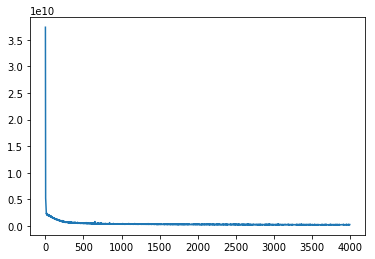

In [20]:
plt.plot(history.history['loss'])

In [21]:
model_rand = create_model()
history = model_rand.fit(X_train, y_train, epochs=3000, batch_size=32, verbose=0)

In [22]:
benchmark(model_rand)

RMSE: 30471.922435264943 
LOGRMSE: 0.14860585137588772


(30471.922435264943, 0.14860585137588772)

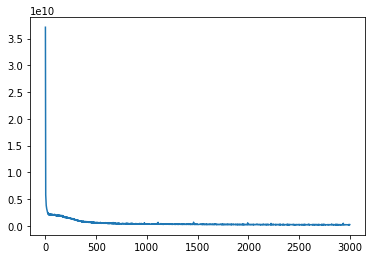

In [23]:
plt.plot(history.history['loss'])

In [24]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=0, n_jobs=-1)
grid_res = grid.fit(X_train, y_train)
for mean,stdev,params in zip(grid_res.cv_results_['mean_test_score'],
                           grid_res.cv_results_['std_test_score'],
                           grid_res.cv_results_['params']):
    print("mean:{} stdev:{} params:{}".format(mean,stdev,params))
print("Best score: {} Best params:{}".format(grid_res.best_score_, grid_res.best_params_))

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/4000
1168/1168 [==============================] - 0s 406us/step - loss: 38428024214.7945
Epoch 2/4000
1168/1168 [==============================] - 0s 31us/step - loss: 35350410730.9589
Epoch 3/4000
1168/1168 [==============================] - 0s 30us/step - loss: 25961678062.4658
Epoch 4/4000
1168/1168 [==============================] - 0s 30us/step - loss: 11988657664.0000
Epoch 5/4000
1168/1168 [==============================] - 0s 30us/step - loss: 9934063566.9041
Epoch 6/4000
1168/1168 [==============================] - 0s 31us/step - loss: 8872384273.5342
Epoch 7/4000
1168/1168 [==============================] - 0s 30us/step - loss: 7433906747.6164
Epoch 8/4000
1168/1168 [==============================] - 0s 31us/step - loss: 7473051732.1644
Epoch 9/4000
1168/1168 [==============================] - 0s 30us/step - loss: 6433566225.5342
Epoch 10/4000
1168/1168 [==============================] - 0s 30us/step - loss: 6091246085.2603
Epoch 11/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 1931015918.4658
Epoch 171/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1911663963.1781
Epoch 172/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1876893862.5753
Epoch 173/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1934415410.8493
Epoch 174/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1880406419.2877
Epoch 175/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1934642432.0000
Epoch 176/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1974543877.2603
Epoch 177/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1924364437.0411
Epoch 178/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1915144821.4795
Epoch 179/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1849452935.0137
Epoch 180/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 1699751176.7671
Epoch 339/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1644867257.8630
Epoch 340/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1579956988.4932
Epoch 341/4000
1168/1168 [==============================] - 0s 31us/step - loss: 1641531136.0000
Epoch 342/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1558705096.3288
Epoch 343/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1607901899.3973
Epoch 344/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1618558644.6027
Epoch 345/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1548860559.3425
Epoch 346/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1484897234.4110
Epoch 347/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1617074786.1918
Epoch 348/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 1251399331.0685
Epoch 507/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1285865975.2329
Epoch 508/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1338657967.3425
Epoch 509/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1243657994.5205
Epoch 510/4000
1168/1168 [==============================] - 0s 29us/step - loss: 1285668369.5342
Epoch 511/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1322208672.4384
Epoch 512/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1313640521.6438
Epoch 513/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1368771101.8082
Epoch 514/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1312293204.1644
Epoch 515/4000
1168/1168 [==============================] - 0s 29us/step - loss: 1302046392.1096
Epoch 516/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 943052683.8356
Epoch 675/4000
1168/1168 [==============================] - 0s 29us/step - loss: 1052611441.7534
Epoch 676/4000
1168/1168 [==============================] - 0s 30us/step - loss: 987756540.4932
Epoch 677/4000
1168/1168 [==============================] - 0s 29us/step - loss: 984009482.9589
Epoch 678/4000
1168/1168 [==============================] - 0s 29us/step - loss: 944418011.1781
Epoch 679/4000
1168/1168 [==============================] - 0s 30us/step - loss: 927656404.1644
Epoch 680/4000
1168/1168 [==============================] - 0s 29us/step - loss: 961118174.2466
Epoch 681/4000
1168/1168 [==============================] - 0s 29us/step - loss: 890873829.2603
Epoch 682/4000
1168/1168 [==============================] - 0s 30us/step - loss: 964749777.0959
Epoch 683/4000
1168/1168 [==============================] - 0s 30us/step - loss: 970061870.4658
Epoch 684/4000
1168/1168 [============================

1168/1168 [==============================] - 0s 30us/step - loss: 792113226.5205
Epoch 845/4000
1168/1168 [==============================] - 0s 30us/step - loss: 768759137.3151
Epoch 846/4000
1168/1168 [==============================] - 0s 30us/step - loss: 724218681.8630
Epoch 847/4000
1168/1168 [==============================] - 0s 30us/step - loss: 771487776.8767
Epoch 848/4000
1168/1168 [==============================] - 0s 30us/step - loss: 964757386.5205
Epoch 849/4000
1168/1168 [==============================] - 0s 30us/step - loss: 893690702.0274
Epoch 850/4000
1168/1168 [==============================] - 0s 30us/step - loss: 748348558.9041
Epoch 851/4000
1168/1168 [==============================] - 0s 30us/step - loss: 788418053.2603
Epoch 852/4000
1168/1168 [==============================] - 0s 30us/step - loss: 714022161.5342
Epoch 853/4000
1168/1168 [==============================] - 0s 30us/step - loss: 756192810.0822
Epoch 854/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 29us/step - loss: 615993719.2329
Epoch 1015/4000
1168/1168 [==============================] - 0s 30us/step - loss: 612531600.2192
Epoch 1016/4000
1168/1168 [==============================] - 0s 30us/step - loss: 634585048.5479
Epoch 1017/4000
1168/1168 [==============================] - 0s 30us/step - loss: 653003722.5205
Epoch 1018/4000
1168/1168 [==============================] - 0s 30us/step - loss: 681983519.5616
Epoch 1019/4000
1168/1168 [==============================] - 0s 30us/step - loss: 632099262.6849
Epoch 1020/4000
1168/1168 [==============================] - 0s 30us/step - loss: 735562925.5890
Epoch 1021/4000
1168/1168 [==============================] - 0s 30us/step - loss: 881988732.0548
Epoch 1022/4000
1168/1168 [==============================] - 0s 30us/step - loss: 708261602.1918
Epoch 1023/4000
1168/1168 [==============================] - 0s 30us/step - loss: 643257252.8219
Epoch 1024/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 606224309.4795
Epoch 1183/4000
1168/1168 [==============================] - 0s 30us/step - loss: 633910484.1644
Epoch 1184/4000
1168/1168 [==============================] - 0s 29us/step - loss: 541724696.5479
Epoch 1185/4000
1168/1168 [==============================] - 0s 29us/step - loss: 516823171.9452
Epoch 1186/4000
1168/1168 [==============================] - 0s 30us/step - loss: 493355406.0274
Epoch 1187/4000
1168/1168 [==============================] - 0s 30us/step - loss: 555416400.6575
Epoch 1188/4000
1168/1168 [==============================] - 0s 30us/step - loss: 494697522.8493
Epoch 1189/4000
1168/1168 [==============================] - 0s 29us/step - loss: 597447407.3425
Epoch 1190/4000
1168/1168 [==============================] - 0s 29us/step - loss: 525665057.7534
Epoch 1191/4000
1168/1168 [==============================] - 0s 30us/step - loss: 513584517.6986
Epoch 1192/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 33us/step - loss: 464592024.9863
Epoch 1351/4000
1168/1168 [==============================] - 0s 30us/step - loss: 487354561.7534
Epoch 1352/4000
1168/1168 [==============================] - 0s 30us/step - loss: 531522078.6849
Epoch 1353/4000
1168/1168 [==============================] - 0s 29us/step - loss: 452622560.8767
Epoch 1354/4000
1168/1168 [==============================] - 0s 30us/step - loss: 512825560.5479
Epoch 1355/4000
1168/1168 [==============================] - 0s 30us/step - loss: 461434064.2192
Epoch 1356/4000
1168/1168 [==============================] - 0s 30us/step - loss: 454424677.9178
Epoch 1357/4000
1168/1168 [==============================] - 0s 30us/step - loss: 490510771.2877
Epoch 1358/4000
1168/1168 [==============================] - 0s 30us/step - loss: 499181846.7945
Epoch 1359/4000
1168/1168 [==============================] - 0s 30us/step - loss: 438184266.5205
Epoch 1360/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 479623177.6438
Epoch 1519/4000
1168/1168 [==============================] - 0s 30us/step - loss: 444074950.1370
Epoch 1520/4000
1168/1168 [==============================] - 0s 30us/step - loss: 424483904.0000
Epoch 1521/4000
1168/1168 [==============================] - 0s 30us/step - loss: 448777158.1370
Epoch 1522/4000
1168/1168 [==============================] - 0s 30us/step - loss: 482030026.5205
Epoch 1523/4000
1168/1168 [==============================] - 0s 30us/step - loss: 436242878.6849
Epoch 1524/4000
1168/1168 [==============================] - 0s 29us/step - loss: 501866645.9178
Epoch 1525/4000
1168/1168 [==============================] - 0s 30us/step - loss: 492127346.8493
Epoch 1526/4000
1168/1168 [==============================] - 0s 30us/step - loss: 406350244.8219
Epoch 1527/4000
1168/1168 [==============================] - 0s 30us/step - loss: 412261567.1233
Epoch 1528/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 491881575.4521
Epoch 1687/4000
1168/1168 [==============================] - 0s 30us/step - loss: 430611015.2329
Epoch 1688/4000
1168/1168 [==============================] - 0s 30us/step - loss: 438662682.3014
Epoch 1689/4000
1168/1168 [==============================] - 0s 30us/step - loss: 424388835.7260
Epoch 1690/4000
1168/1168 [==============================] - 0s 29us/step - loss: 412176970.5205
Epoch 1691/4000
1168/1168 [==============================] - 0s 30us/step - loss: 444611358.6849
Epoch 1692/4000
1168/1168 [==============================] - 0s 30us/step - loss: 377627185.0959
Epoch 1693/4000
1168/1168 [==============================] - 0s 30us/step - loss: 418493827.5068
Epoch 1694/4000
1168/1168 [==============================] - 0s 30us/step - loss: 410393681.7534
Epoch 1695/4000
1168/1168 [==============================] - 0s 29us/step - loss: 455404767.5616
Epoch 1696/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 406752382.2466
Epoch 1855/4000
1168/1168 [==============================] - 0s 30us/step - loss: 410039638.7945
Epoch 1856/4000
1168/1168 [==============================] - 0s 29us/step - loss: 375284292.3836
Epoch 1857/4000
1168/1168 [==============================] - 0s 29us/step - loss: 384626368.0000
Epoch 1858/4000
1168/1168 [==============================] - 0s 30us/step - loss: 427056468.1644
Epoch 1859/4000
1168/1168 [==============================] - 0s 30us/step - loss: 383463226.3014
Epoch 1860/4000
1168/1168 [==============================] - 0s 30us/step - loss: 368415857.9726
Epoch 1861/4000
1168/1168 [==============================] - 0s 30us/step - loss: 373948186.3014
Epoch 1862/4000
1168/1168 [==============================] - 0s 30us/step - loss: 369251784.7671
Epoch 1863/4000
1168/1168 [==============================] - 0s 29us/step - loss: 490161849.8630
Epoch 1864/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 344408619.8356
Epoch 2023/4000
1168/1168 [==============================] - 0s 30us/step - loss: 358529772.7123
Epoch 2024/4000
1168/1168 [==============================] - 0s 30us/step - loss: 348686442.9589
Epoch 2025/4000
1168/1168 [==============================] - 0s 30us/step - loss: 340857986.1918
Epoch 2026/4000
1168/1168 [==============================] - 0s 29us/step - loss: 373187004.0548
Epoch 2027/4000
1168/1168 [==============================] - 0s 30us/step - loss: 363366950.5753
Epoch 2028/4000
1168/1168 [==============================] - 0s 30us/step - loss: 373727465.6438
Epoch 2029/4000
1168/1168 [==============================] - 0s 30us/step - loss: 356087857.9726
Epoch 2030/4000
1168/1168 [==============================] - 0s 29us/step - loss: 400997628.4932
Epoch 2031/4000
1168/1168 [==============================] - 0s 30us/step - loss: 446453850.3014
Epoch 2032/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 343535713.3151
Epoch 2191/4000
1168/1168 [==============================] - 0s 28us/step - loss: 333773481.2055
Epoch 2192/4000
1168/1168 [==============================] - 0s 29us/step - loss: 370492657.9726
Epoch 2193/4000
1168/1168 [==============================] - 0s 29us/step - loss: 369114743.2329
Epoch 2194/4000
1168/1168 [==============================] - 0s 29us/step - loss: 379098759.8904
Epoch 2195/4000
1168/1168 [==============================] - 0s 30us/step - loss: 392991361.7534
Epoch 2196/4000
1168/1168 [==============================] - 0s 29us/step - loss: 362625795.9452
Epoch 2197/4000
1168/1168 [==============================] - 0s 30us/step - loss: 348924702.2466
Epoch 2198/4000
1168/1168 [==============================] - 0s 29us/step - loss: 339882552.5479
Epoch 2199/4000
1168/1168 [==============================] - 0s 29us/step - loss: 352106159.5616
Epoch 2200/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 31us/step - loss: 356833559.6712
Epoch 2359/4000
1168/1168 [==============================] - 0s 30us/step - loss: 352104547.9452
Epoch 2360/4000
1168/1168 [==============================] - 0s 31us/step - loss: 331816513.7534
Epoch 2361/4000
1168/1168 [==============================] - 0s 31us/step - loss: 331333128.3288
Epoch 2362/4000
1168/1168 [==============================] - 0s 31us/step - loss: 319726021.2603
Epoch 2363/4000
1168/1168 [==============================] - 0s 31us/step - loss: 356159901.8082
Epoch 2364/4000
1168/1168 [==============================] - 0s 31us/step - loss: 350913750.7945
Epoch 2365/4000
1168/1168 [==============================] - 0s 30us/step - loss: 347192849.0959
Epoch 2366/4000
1168/1168 [==============================] - 0s 30us/step - loss: 337012298.0822
Epoch 2367/4000
1168/1168 [==============================] - 0s 30us/step - loss: 353300275.7260
Epoch 2368/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 325639550.2466
Epoch 2527/4000
1168/1168 [==============================] - 0s 30us/step - loss: 353060775.4521
Epoch 2528/4000
1168/1168 [==============================] - 0s 30us/step - loss: 387167678.9041
Epoch 2529/4000
1168/1168 [==============================] - 0s 30us/step - loss: 355953720.1096
Epoch 2530/4000
1168/1168 [==============================] - 0s 30us/step - loss: 339451515.1781
Epoch 2531/4000
1168/1168 [==============================] - 0s 30us/step - loss: 348720795.1781
Epoch 2532/4000
1168/1168 [==============================] - 0s 30us/step - loss: 316882830.6849
Epoch 2533/4000
1168/1168 [==============================] - 0s 30us/step - loss: 327119677.8082
Epoch 2534/4000
1168/1168 [==============================] - 0s 32us/step - loss: 360892113.9726
Epoch 2535/4000
1168/1168 [==============================] - 0s 30us/step - loss: 339664643.0685
Epoch 2536/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 351470912.8767
Epoch 2695/4000
1168/1168 [==============================] - 0s 30us/step - loss: 322137786.7397
Epoch 2696/4000
1168/1168 [==============================] - 0s 31us/step - loss: 332262022.1370
Epoch 2697/4000
1168/1168 [==============================] - 0s 30us/step - loss: 306338452.6027
Epoch 2698/4000
1168/1168 [==============================] - 0s 31us/step - loss: 336173418.0822
Epoch 2699/4000
1168/1168 [==============================] - 0s 31us/step - loss: 377397203.7260
Epoch 2700/4000
1168/1168 [==============================] - 0s 30us/step - loss: 348262640.2192
Epoch 2701/4000
1168/1168 [==============================] - 0s 31us/step - loss: 337841408.8767
Epoch 2702/4000
1168/1168 [==============================] - 0s 30us/step - loss: 315531456.8767
Epoch 2703/4000
1168/1168 [==============================] - 0s 30us/step - loss: 328831313.2055
Epoch 2704/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 380413928.3288
Epoch 2863/4000
1168/1168 [==============================] - 0s 30us/step - loss: 375870372.8219
Epoch 2864/4000
1168/1168 [==============================] - 0s 29us/step - loss: 370272637.5890
Epoch 2865/4000
1168/1168 [==============================] - 0s 32us/step - loss: 373740207.7808
Epoch 2866/4000
1168/1168 [==============================] - 0s 29us/step - loss: 327164311.0137
Epoch 2867/4000
1168/1168 [==============================] - 0s 29us/step - loss: 328891443.7260
Epoch 2868/4000
1168/1168 [==============================] - 0s 29us/step - loss: 329906325.9178
Epoch 2869/4000
1168/1168 [==============================] - 0s 29us/step - loss: 316367421.8082
Epoch 2870/4000
1168/1168 [==============================] - 0s 29us/step - loss: 321743657.6438
Epoch 2871/4000
1168/1168 [==============================] - 0s 30us/step - loss: 342110972.9315
Epoch 2872/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 362408206.4658
Epoch 3031/4000
1168/1168 [==============================] - 0s 30us/step - loss: 356482339.9452
Epoch 3032/4000
1168/1168 [==============================] - 0s 29us/step - loss: 328236549.0411
Epoch 3033/4000
1168/1168 [==============================] - 0s 30us/step - loss: 298382359.6712
Epoch 3034/4000
1168/1168 [==============================] - 0s 30us/step - loss: 299712008.3288
Epoch 3035/4000
1168/1168 [==============================] - 0s 30us/step - loss: 316172070.1370
Epoch 3036/4000
1168/1168 [==============================] - 0s 30us/step - loss: 308389458.8493
Epoch 3037/4000
1168/1168 [==============================] - 0s 30us/step - loss: 311625094.4658
Epoch 3038/4000
1168/1168 [==============================] - 0s 30us/step - loss: 306658988.7123
Epoch 3039/4000
1168/1168 [==============================] - 0s 30us/step - loss: 307698424.1096
Epoch 3040/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 335761005.5890
Epoch 3199/4000
1168/1168 [==============================] - 0s 29us/step - loss: 312120745.2055
Epoch 3200/4000
1168/1168 [==============================] - 0s 29us/step - loss: 343920505.8630
Epoch 3201/4000
1168/1168 [==============================] - 0s 29us/step - loss: 309543272.5479
Epoch 3202/4000
1168/1168 [==============================] - 0s 30us/step - loss: 320100589.5890
Epoch 3203/4000
1168/1168 [==============================] - 0s 29us/step - loss: 314351727.3425
Epoch 3204/4000
1168/1168 [==============================] - 0s 29us/step - loss: 323357987.9452
Epoch 3205/4000
1168/1168 [==============================] - 0s 29us/step - loss: 324664781.5890
Epoch 3206/4000
1168/1168 [==============================] - 0s 29us/step - loss: 296886666.0822
Epoch 3207/4000
1168/1168 [==============================] - 0s 29us/step - loss: 315428898.1918
Epoch 3208/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 347539927.6712
Epoch 3367/4000
1168/1168 [==============================] - 0s 32us/step - loss: 342864620.2740
Epoch 3368/4000
1168/1168 [==============================] - 0s 29us/step - loss: 343569938.4110
Epoch 3369/4000
1168/1168 [==============================] - 0s 33us/step - loss: 311102429.8082
Epoch 3370/4000
1168/1168 [==============================] - 0s 30us/step - loss: 319782365.8082
Epoch 3371/4000
1168/1168 [==============================] - 0s 30us/step - loss: 285369821.8082
Epoch 3372/4000
1168/1168 [==============================] - 0s 30us/step - loss: 314470369.3151
Epoch 3373/4000
1168/1168 [==============================] - 0s 29us/step - loss: 287407627.8356
Epoch 3374/4000
1168/1168 [==============================] - 0s 29us/step - loss: 285983259.6164
Epoch 3375/4000
1168/1168 [==============================] - 0s 29us/step - loss: 332385280.8767
Epoch 3376/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 304412422.7945
Epoch 3535/4000
1168/1168 [==============================] - 0s 30us/step - loss: 294282344.3288
Epoch 3536/4000
1168/1168 [==============================] - 0s 29us/step - loss: 301626061.4795
Epoch 3537/4000
1168/1168 [==============================] - 0s 30us/step - loss: 321414516.6027
Epoch 3538/4000
1168/1168 [==============================] - 0s 30us/step - loss: 272933127.0137
Epoch 3539/4000
1168/1168 [==============================] - 0s 30us/step - loss: 296232557.2603
Epoch 3540/4000
1168/1168 [==============================] - 0s 30us/step - loss: 327765759.5616
Epoch 3541/4000
1168/1168 [==============================] - 0s 30us/step - loss: 413169319.4521
Epoch 3542/4000
1168/1168 [==============================] - 0s 29us/step - loss: 293313965.1507
Epoch 3543/4000
1168/1168 [==============================] - 0s 30us/step - loss: 329100211.5068
Epoch 3544/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 290692566.7945
Epoch 3703/4000
1168/1168 [==============================] - 0s 29us/step - loss: 292971781.2603
Epoch 3704/4000
1168/1168 [==============================] - 0s 30us/step - loss: 312600808.3288
Epoch 3705/4000
1168/1168 [==============================] - 0s 30us/step - loss: 295053770.9589
Epoch 3706/4000
1168/1168 [==============================] - 0s 30us/step - loss: 280372780.7123
Epoch 3707/4000
1168/1168 [==============================] - 0s 30us/step - loss: 323503451.1781
Epoch 3708/4000
1168/1168 [==============================] - 0s 29us/step - loss: 327692735.1233
Epoch 3709/4000
1168/1168 [==============================] - 0s 31us/step - loss: 309031332.9315
Epoch 3710/4000
1168/1168 [==============================] - 0s 31us/step - loss: 305595128.9863
Epoch 3711/4000
1168/1168 [==============================] - 0s 30us/step - loss: 329504966.3562
Epoch 3712/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 316888138.5205
Epoch 3871/4000
1168/1168 [==============================] - 0s 30us/step - loss: 307880371.7260
Epoch 3872/4000
1168/1168 [==============================] - 0s 30us/step - loss: 278467035.6164
Epoch 3873/4000
1168/1168 [==============================] - 0s 29us/step - loss: 299479530.9589
Epoch 3874/4000
1168/1168 [==============================] - 0s 30us/step - loss: 292771937.3151
Epoch 3875/4000
1168/1168 [==============================] - 0s 30us/step - loss: 278755370.9589
Epoch 3876/4000
1168/1168 [==============================] - 0s 30us/step - loss: 275593707.3973
Epoch 3877/4000
1168/1168 [==============================] - 0s 31us/step - loss: 314161111.2329
Epoch 3878/4000
1168/1168 [==============================] - 0s 31us/step - loss: 285552850.4110
Epoch 3879/4000
1168/1168 [==============================] - 0s 30us/step - loss: 303571685.2603
Epoch 3880/4000
1168/1168 [===================

In [26]:
#Best score: -1229757790.4383562 Best params:{'batch_size': 64, 'epochs': 4000}
model_grid = create_model()

In [27]:
history = model_grid.fit(X_train, y_train, epochs=3000, batch_size=64, verbose=0)

In [29]:
benchmark(model_grid)

RMSE: 29228.664240847396 
LOGRMSE: 0.12854169302909504


(29228.664240847396, 0.12854169302909504)

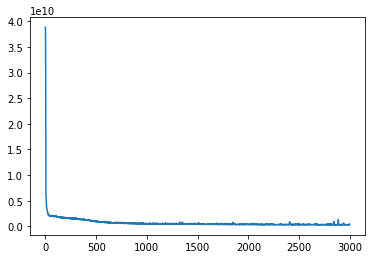

In [30]:
plt.plot(history.history['loss'])

In [35]:
y_log_train = y_train.copy()
y_log_train = np.log(y_train)

In [36]:
batch_size = [16, 32, 48, 64, 80, 96]
epochs = [100, 500, 1000, 1500, 2000, 2500, 3000]

param_grid = dict(batch_size=batch_size,epochs=epochs)
rscv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, verbose=0, n_jobs=-1,random_state=123)
result = rscv.fit(X_train, y_log_train)
for mean,stdev,param in zip(result.cv_results_['mean_test_score'],
                           result.cv_results_['std_test_score'],
                           result.cv_results_['params']):
    print("mean:{} stdev:{} param:{}".format(mean,stdev,param))
print("Best score: {} Best param:{}".format(result.best_score_, result.best_params_))

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/2500
1168/1168 [==============================] - 1s 576us/step - loss: 10653.2559
Epoch 2/2500
1168/1168 [==============================] - 0s 87us/step - loss: 1901.9065
Epoch 3/2500
1168/1168 [==============================] - 0s 87us/step - loss: 1179.4433
Epoch 4/2500
1168/1168 [==============================] - 0s 88us/step - loss: 1577.5059
Epoch 5/2500
1168/1168 [==============================] - 0s 84us/step - loss: 492.3338
Epoch 6/2500
1168/1168 [==============================] - 0s 86us/step - loss: 604.1790
Epoch 7/2500
1168/1168 [==============================] - 0s 86us/step - loss: 62.0339
Epoch 8/2500
1168/1168 [==============================] - 0s 87us/step - loss: 49.2297
Epoch 9/2500
1168/1168 [==============================] - 0s 86us/step - loss: 23.0852
Epoch 10/2500
1168/1168 [==============================] - 0s 87us/step - loss: 32.0712
Epoch 11/2500
1168/1168 [==============================] - 0s 85us/step - loss: 43.1055
Epoch 12/2500
1168/1168 [====

1168/1168 [==============================] - 0s 84us/step - loss: 0.4327
Epoch 188/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.5075
Epoch 189/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.5285
Epoch 190/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.6221
Epoch 191/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.6347
Epoch 192/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.4472
Epoch 193/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.3824
Epoch 194/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.3906
Epoch 195/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.4477
Epoch 196/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.3770
Epoch 197/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.3819
Epoch 198/2500
1168/1168 [=====================

1168/1168 [==============================] - 0s 86us/step - loss: 0.2332
Epoch 374/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.2293
Epoch 375/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.2293
Epoch 376/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.2874
Epoch 377/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.5668
Epoch 378/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.2814
Epoch 379/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.2390
Epoch 380/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.2282
Epoch 381/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.2652
Epoch 382/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.2729
Epoch 383/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.2593
Epoch 384/2500
1168/1168 [=====================

1168/1168 [==============================] - 0s 84us/step - loss: 0.0845
Epoch 560/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0929
Epoch 561/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0937
Epoch 562/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0682
Epoch 563/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.1254
Epoch 564/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0975
Epoch 565/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0887
Epoch 566/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0685
Epoch 567/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.1162
Epoch 568/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.2317
Epoch 569/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.1071
Epoch 570/2500
1168/1168 [=====================

1168/1168 [==============================] - 0s 84us/step - loss: 0.0722
Epoch 746/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0651
Epoch 747/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0580
Epoch 748/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.1013
Epoch 749/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0929
Epoch 750/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0776
Epoch 751/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0587
Epoch 752/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0996
Epoch 753/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0970
Epoch 754/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0862
Epoch 755/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0600
Epoch 756/2500
1168/1168 [=====================

1168/1168 [==============================] - 0s 88us/step - loss: 0.0708
Epoch 932/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0676
Epoch 933/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0577
Epoch 934/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0581
Epoch 935/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0933
Epoch 936/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0666
Epoch 937/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0639
Epoch 938/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.1195
Epoch 939/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0726
Epoch 940/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0665
Epoch 941/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0668
Epoch 942/2500
1168/1168 [=====================

Epoch 1024/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0523
Epoch 1025/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0643
Epoch 1026/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0694
Epoch 1027/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0715
Epoch 1028/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0509
Epoch 1029/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0740
Epoch 1030/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0525
Epoch 1031/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0597
Epoch 1032/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0549
Epoch 1033/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0885
Epoch 1034/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0606
Epoch 1035/2500
1168/

1168/1168 [==============================] - 0s 86us/step - loss: 0.0528
Epoch 1117/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0464
Epoch 1118/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0676
Epoch 1119/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.0534
Epoch 1120/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0554
Epoch 1121/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0581
Epoch 1122/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0534
Epoch 1123/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0594
Epoch 1124/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0818
Epoch 1125/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0697
Epoch 1126/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0886
Epoch 1127/2500
1168/1168 [==========

1168/1168 [==============================] - 0s 88us/step - loss: 0.0485
Epoch 1301/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.0600
Epoch 1302/2500
1168/1168 [==============================] - 0s 90us/step - loss: 0.0495
Epoch 1303/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0442
Epoch 1304/2500
1168/1168 [==============================] - 0s 98us/step - loss: 0.0482
Epoch 1305/2500
1168/1168 [==============================] - 0s 105us/step - loss: 0.0560
Epoch 1306/2500
1168/1168 [==============================] - 0s 91us/step - loss: 0.0542
Epoch 1307/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0865
Epoch 1308/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0432
Epoch 1309/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0400
Epoch 1310/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0496
Epoch 1311/2500
1168/1168 [=========

1168/1168 [==============================] - 0s 85us/step - loss: 0.0852
Epoch 1393/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0413
Epoch 1394/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0367
Epoch 1395/2500
1168/1168 [==============================] - ETA: 0s - loss: 0.061 - 0s 84us/step - loss: 0.0500
Epoch 1396/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0432
Epoch 1397/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0338
Epoch 1398/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0408
Epoch 1399/2500
1168/1168 [==============================] - 0s 83us/step - loss: 0.0783
Epoch 1400/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0441
Epoch 1401/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.1049
Epoch 1402/2500
1168/1168 [==============================] - 0s 83us/step - loss: 0.0483
Epoch 1403/25

Epoch 1484/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.0405
Epoch 1485/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0391
Epoch 1486/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0385
Epoch 1487/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0342
Epoch 1488/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.1187
Epoch 1489/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0576
Epoch 1490/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0713
Epoch 1491/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0390
Epoch 1492/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0414
Epoch 1493/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0853
Epoch 1494/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0502
Epoch 1495/2500
1168/

1168/1168 [==============================] - 0s 87us/step - loss: 0.0325
Epoch 1577/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0326
Epoch 1578/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0289
Epoch 1579/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0352: 0s - loss: 0.032
Epoch 1580/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0470
Epoch 1581/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0437
Epoch 1582/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.1027
Epoch 1583/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0571
Epoch 1584/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0330
Epoch 1585/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0439
Epoch 1586/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0334
Epoch 1587/2500
116

1168/1168 [==============================] - 0s 85us/step - loss: 0.0354
Epoch 1669/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0610
Epoch 1670/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0881
Epoch 1671/2500
1168/1168 [==============================] - 0s 91us/step - loss: 0.0350
Epoch 1672/2500
1168/1168 [==============================] - 0s 91us/step - loss: 0.0344
Epoch 1673/2500
1168/1168 [==============================] - 0s 91us/step - loss: 0.0321
Epoch 1674/2500
1168/1168 [==============================] - 0s 89us/step - loss: 0.0326
Epoch 1675/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0308
Epoch 1676/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0359
Epoch 1677/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0331
Epoch 1678/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.0365
Epoch 1679/2500
1168/1168 [==========

1168/1168 [==============================] - 0s 87us/step - loss: 0.0257
Epoch 1853/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0271
Epoch 1854/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0287
Epoch 1855/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0306
Epoch 1856/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0294
Epoch 1857/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0287
Epoch 1858/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0275
Epoch 1859/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0299
Epoch 1860/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0330
Epoch 1861/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0294
Epoch 1862/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0313
Epoch 1863/2500
1168/1168 [==========

1168/1168 [==============================] - 0s 84us/step - loss: 0.0257
Epoch 2037/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0275
Epoch 2038/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0283
Epoch 2039/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0302
Epoch 2040/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0693
Epoch 2041/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0368
Epoch 2042/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0225
Epoch 2043/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0288
Epoch 2044/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0225
Epoch 2045/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.0268
Epoch 2046/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0280
Epoch 2047/2500
1168/1168 [==========

1168/1168 [==============================] - 0s 85us/step - loss: 0.0214
Epoch 2221/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0203
Epoch 2222/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0193
Epoch 2223/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0192
Epoch 2224/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0183
Epoch 2225/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0193
Epoch 2226/2500
1168/1168 [==============================] - 0s 89us/step - loss: 0.0216
Epoch 2227/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0185
Epoch 2228/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0211
Epoch 2229/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0226
Epoch 2230/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0185
Epoch 2231/2500
1168/1168 [==========

Epoch 2312/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0196
Epoch 2313/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0181
Epoch 2314/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0190
Epoch 2315/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0159
Epoch 2316/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0191
Epoch 2317/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0277
Epoch 2318/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0237
Epoch 2319/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0185
Epoch 2320/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0653
Epoch 2321/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0335
Epoch 2322/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0247
Epoch 2323/2500
1168/

1168/1168 [==============================] - 0s 88us/step - loss: 0.0194
Epoch 2496/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.0211
Epoch 2497/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.0203
Epoch 2498/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0208
Epoch 2499/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0221
Epoch 2500/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0198
mean:-1.5233550651305139 stdev:1.425519537533588 param:{'epochs': 3000, 'batch_size': 64}
mean:-1.8836565389718911 stdev:0.8948734717864916 param:{'epochs': 2500, 'batch_size': 32}
mean:-1.774679256583985 stdev:1.1421975881132307 param:{'epochs': 2000, 'batch_size': 32}
mean:-29.935994971441488 stdev:18.87333835277278 param:{'epochs': 100, 'batch_size': 96}
mean:-2.49963052578953 stdev:1.8576429348059065 param:{'epochs': 1500, 'batch_size': 32}
mean:-0.2568082784777762 stdev:0.

In [37]:
# Best score: -0.2568082784777762 Best param:{'epochs': 2500, 'batch_size': 16}

In [38]:
model_log = create_model()

In [40]:
history = model_log.fit(X_train, y_log_train, epochs=2500, batch_size=16, verbose=0)

In [41]:
def benchmark2(model):
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, np.exp(pred)))
    logrmse = np.sqrt(mean_squared_error(np.log(y_test), pred))
    print("RMSE: {} \nLOGRMSE: {}".format(rmse, logrmse))
    return rmse, logrmse

In [42]:
benchmark2(model_log)

RMSE: 64929.97606060786 
LOGRMSE: 0.3075666397657423


(64929.97606060786, 0.3075666397657423)

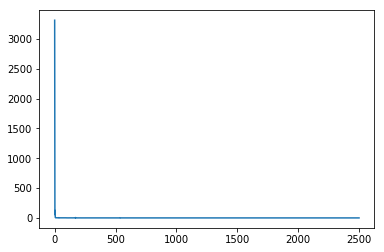

In [43]:
plt.plot(history.history['loss'])

In [44]:
model_log = create_model()
history = model_log.fit(X_train, y_log_train, epochs=2000, batch_size=8, verbose=0)

In [45]:
benchmark2(model_log)

RMSE: 52327.41438972014 
LOGRMSE: 0.2258705656342164


(52327.41438972014, 0.2258705656342164)

In [51]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(300,activation="relu")) 
    model.add(Dropout(0.2))
    model.add(Dense(50, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [52]:
model=create_model()
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3350,batch_size=32,verbose=0)

In [53]:
benchmark(model)

RMSE: 28198.137935216615 
LOGRMSE: 0.1324292037123303


(28198.137935216615, 0.1324292037123303)

In [55]:
import time

In [57]:
model=create_model()
start_time = time.time()
history=model.fit(X_train,y_train,epochs=3000,batch_size=64,verbose=0)
end_time = time.time()
print("cost: {}".format((end_time -start_time) / 60))

cost: 1.8433632135391236


In [58]:
benchmark(model)

RMSE: 26289.883661508688 
LOGRMSE: 0.12675866148491305


(26289.883661508688, 0.12675866148491305)

## 用网格搜索控制单一变量

In [61]:
model = KerasRegressor(build_fn=create_model)

In [63]:
batch_size = [32, 64]
epochs = [2800,2900,3000,3100,3200,3300,3400]
param_grid = dict(batch_size=batch_size,epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=0, n_jobs=-1)

start_time = time.time()
result = grid.fit(X_train, y_train)
end_time = time.time()

for mean,stdev,param in zip(result.cv_results_['mean_test_score'],
                           result.cv_results_['std_test_score'],
                           result.cv_results_['params']):
    print("mean:{} stdev:{} params:{}".format(mean, stdev, param))
print("Best score: {} Best params:{}".format(result.best_score_, result.best_params_))

print("Cost time: {} s".format(end_time - start_time))

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/3300
1168/1168 [==============================] - 1s 950us/step - loss: 37070000604.9315
Epoch 2/3300
1168/1168 [==============================] - 0s 54us/step - loss: 18904154638.0274
Epoch 3/3300
1168/1168 [==============================] - 0s 53us/step - loss: 9689316397.5890
Epoch 4/3300
1168/1168 [==============================] - 0s 53us/step - loss: 7487260847.3425
Epoch 5/3300
1168/1168 [==============================] - 0s 54us/step - loss: 6130211647.1233
Epoch 6/3300
1168/1168 [==============================] - 0s 54us/step - loss: 5297675278.0274
Epoch 7/3300
1168/1168 [==============================] - 0s 54us/step - loss: 4788218922.0822
Epoch 8/3300
1168/1168 [==============================] - 0s 54us/step - loss: 4333838321.9726
Epoch 9/3300
1168/1168 [==============================] - 0s 55us/step - loss: 4055967437.1507
Epoch 10/3300
1168/1168 [==============================] - 0s 54us/step - loss: 3955541793.3151
Epoch 11/3300
1168/1168 [=====================

1168/1168 [==============================] - 0s 54us/step - loss: 1604479608.1096
Epoch 171/3300
1168/1168 [==============================] - 0s 54us/step - loss: 1573342270.2466
Epoch 172/3300
1168/1168 [==============================] - 0s 55us/step - loss: 1579519291.6164
Epoch 173/3300
1168/1168 [==============================] - 0s 54us/step - loss: 1565992426.9589
Epoch 174/3300
1168/1168 [==============================] - 0s 55us/step - loss: 1492296984.1096
Epoch 175/3300
1168/1168 [==============================] - 0s 54us/step - loss: 1606990155.3973
Epoch 176/3300
1168/1168 [==============================] - 0s 53us/step - loss: 1546950675.2877
Epoch 177/3300
1168/1168 [==============================] - 0s 54us/step - loss: 1534244785.9726
Epoch 178/3300
1168/1168 [==============================] - 0s 54us/step - loss: 1588210368.8767
Epoch 179/3300
1168/1168 [==============================] - 0s 55us/step - loss: 1568908147.7260
Epoch 180/3300
1168/1168 [===================

1168/1168 [==============================] - 0s 54us/step - loss: 754112846.9041
Epoch 340/3300
1168/1168 [==============================] - 0s 55us/step - loss: 733624464.6575
Epoch 341/3300
1168/1168 [==============================] - 0s 55us/step - loss: 741908753.0959
Epoch 342/3300
1168/1168 [==============================] - 0s 54us/step - loss: 743914912.4384
Epoch 343/3300
1168/1168 [==============================] - 0s 53us/step - loss: 703874509.1507
Epoch 344/3300
1168/1168 [==============================] - 0s 54us/step - loss: 719233110.7945
Epoch 345/3300
1168/1168 [==============================] - 0s 55us/step - loss: 693767150.0274
Epoch 346/3300
1168/1168 [==============================] - 0s 54us/step - loss: 699351881.6438
Epoch 347/3300
1168/1168 [==============================] - 0s 54us/step - loss: 698578068.1644
Epoch 348/3300
1168/1168 [==============================] - 0s 54us/step - loss: 692530751.1233
Epoch 349/3300
1168/1168 [=============================

1168/1168 [==============================] - 0s 54us/step - loss: 489482811.1781
Epoch 510/3300
1168/1168 [==============================] - 0s 54us/step - loss: 519677722.7397
Epoch 511/3300
1168/1168 [==============================] - 0s 53us/step - loss: 459298571.3973
Epoch 512/3300
1168/1168 [==============================] - 0s 54us/step - loss: 499948327.0137
Epoch 513/3300
1168/1168 [==============================] - 0s 55us/step - loss: 468194129.0959
Epoch 514/3300
1168/1168 [==============================] - 0s 54us/step - loss: 499039647.5616
Epoch 515/3300
1168/1168 [==============================] - 0s 53us/step - loss: 466294839.2329
Epoch 516/3300
1168/1168 [==============================] - 0s 53us/step - loss: 478857418.5205
Epoch 517/3300
1168/1168 [==============================] - 0s 53us/step - loss: 611407562.5205
Epoch 518/3300
1168/1168 [==============================] - 0s 53us/step - loss: 502028440.9863
Epoch 519/3300
1168/1168 [=============================

1168/1168 [==============================] - 0s 55us/step - loss: 410264528.2192
Epoch 680/3300
1168/1168 [==============================] - 0s 54us/step - loss: 465045716.1644
Epoch 681/3300
1168/1168 [==============================] - 0s 54us/step - loss: 410708891.8356
Epoch 682/3300
1168/1168 [==============================] - 0s 54us/step - loss: 410805861.6986
Epoch 683/3300
1168/1168 [==============================] - 0s 53us/step - loss: 404651606.1370
Epoch 684/3300
1168/1168 [==============================] - 0s 54us/step - loss: 403229059.0685
Epoch 685/3300
1168/1168 [==============================] - 0s 54us/step - loss: 378477498.3014
Epoch 686/3300
1168/1168 [==============================] - 0s 54us/step - loss: 380011427.0685
Epoch 687/3300
1168/1168 [==============================] - 0s 53us/step - loss: 385332629.4795
Epoch 688/3300
1168/1168 [==============================] - 0s 53us/step - loss: 435221044.3836
Epoch 689/3300
1168/1168 [=============================

1168/1168 [==============================] - 0s 55us/step - loss: 343601423.3425
Epoch 850/3300
1168/1168 [==============================] - 0s 55us/step - loss: 354647576.5479
Epoch 851/3300
1168/1168 [==============================] - 0s 54us/step - loss: 327422172.7123
Epoch 852/3300
1168/1168 [==============================] - 0s 54us/step - loss: 389508221.8082
Epoch 853/3300
1168/1168 [==============================] - 0s 53us/step - loss: 355774435.0685
Epoch 854/3300
1168/1168 [==============================] - 0s 53us/step - loss: 335677420.7123
Epoch 855/3300
1168/1168 [==============================] - 0s 53us/step - loss: 342781922.1918
Epoch 856/3300
1168/1168 [==============================] - 0s 53us/step - loss: 366453562.0822
Epoch 857/3300
1168/1168 [==============================] - 0s 53us/step - loss: 345015795.7260
Epoch 858/3300
1168/1168 [==============================] - 0s 54us/step - loss: 332055371.3973
Epoch 859/3300
1168/1168 [=============================

1168/1168 [==============================] - 0s 53us/step - loss: 317660534.7945
Epoch 1020/3300
1168/1168 [==============================] - 0s 54us/step - loss: 306318791.8904
Epoch 1021/3300
1168/1168 [==============================] - 0s 53us/step - loss: 336124096.4384
Epoch 1022/3300
1168/1168 [==============================] - 0s 53us/step - loss: 324494406.5753
Epoch 1023/3300
1168/1168 [==============================] - 0s 53us/step - loss: 300780114.8493
Epoch 1024/3300
1168/1168 [==============================] - 0s 54us/step - loss: 313103692.4932
Epoch 1025/3300
1168/1168 [==============================] - 0s 53us/step - loss: 330753314.1918
Epoch 1026/3300
1168/1168 [==============================] - 0s 54us/step - loss: 294046918.5753
Epoch 1027/3300
1168/1168 [==============================] - 0s 54us/step - loss: 312302722.1918
Epoch 1028/3300
1168/1168 [==============================] - 0s 53us/step - loss: 334455988.8219
Epoch 1029/3300
1168/1168 [===================

1168/1168 [==============================] - 0s 54us/step - loss: 275150985.6438
Epoch 1188/3300
1168/1168 [==============================] - 0s 54us/step - loss: 282356347.6164
Epoch 1189/3300
1168/1168 [==============================] - 0s 54us/step - loss: 284150876.9315
Epoch 1190/3300
1168/1168 [==============================] - 0s 54us/step - loss: 264826156.0548
Epoch 1191/3300
1168/1168 [==============================] - 0s 54us/step - loss: 275229869.6986
Epoch 1192/3300
1168/1168 [==============================] - 0s 54us/step - loss: 289019418.5205
Epoch 1193/3300
1168/1168 [==============================] - 0s 54us/step - loss: 307291314.8493
Epoch 1194/3300
1168/1168 [==============================] - 0s 54us/step - loss: 300009894.7945
Epoch 1195/3300
1168/1168 [==============================] - 0s 54us/step - loss: 304691212.9315
Epoch 1196/3300
1168/1168 [==============================] - 0s 53us/step - loss: 319487199.5616
Epoch 1197/3300
1168/1168 [===================

1168/1168 [==============================] - 0s 54us/step - loss: 280469194.3014
Epoch 1356/3300
1168/1168 [==============================] - 0s 53us/step - loss: 272649725.1507
Epoch 1357/3300
1168/1168 [==============================] - 0s 53us/step - loss: 293549289.2055
Epoch 1358/3300
1168/1168 [==============================] - 0s 52us/step - loss: 270006320.8767
Epoch 1359/3300
1168/1168 [==============================] - 0s 52us/step - loss: 288228650.3014
Epoch 1360/3300
1168/1168 [==============================] - 0s 54us/step - loss: 298527407.5616
Epoch 1361/3300
1168/1168 [==============================] - 0s 56us/step - loss: 284511600.8767
Epoch 1362/3300
1168/1168 [==============================] - 0s 54us/step - loss: 296321181.8082
Epoch 1363/3300
1168/1168 [==============================] - 0s 55us/step - loss: 282878119.4521
Epoch 1364/3300
1168/1168 [==============================] - 0s 55us/step - loss: 267050697.6438
Epoch 1365/3300
1168/1168 [===================

1168/1168 [==============================] - 0s 54us/step - loss: 296479602.1918
Epoch 1524/3300
1168/1168 [==============================] - 0s 54us/step - loss: 275526791.4521
Epoch 1525/3300
1168/1168 [==============================] - 0s 55us/step - loss: 274424006.1370
Epoch 1526/3300
1168/1168 [==============================] - 0s 54us/step - loss: 273512345.8630
Epoch 1527/3300
1168/1168 [==============================] - 0s 54us/step - loss: 300762105.4247
Epoch 1528/3300
1168/1168 [==============================] - 0s 54us/step - loss: 286896412.7123
Epoch 1529/3300
1168/1168 [==============================] - 0s 54us/step - loss: 303810329.8630
Epoch 1530/3300
1168/1168 [==============================] - 0s 56us/step - loss: 308551427.2877
Epoch 1531/3300
1168/1168 [==============================] - 0s 54us/step - loss: 261390805.9178
Epoch 1532/3300
1168/1168 [==============================] - 0s 54us/step - loss: 293381504.0000
Epoch 1533/3300
1168/1168 [===================

1168/1168 [==============================] - 0s 53us/step - loss: 249466567.2329
Epoch 1692/3300
1168/1168 [==============================] - 0s 55us/step - loss: 278350169.6438
Epoch 1693/3300
1168/1168 [==============================] - 0s 54us/step - loss: 254048121.6438
Epoch 1694/3300
1168/1168 [==============================] - 0s 54us/step - loss: 260100641.3151
Epoch 1695/3300
1168/1168 [==============================] - 0s 55us/step - loss: 249296113.0959
Epoch 1696/3300
1168/1168 [==============================] - 0s 68us/step - loss: 277835578.7397
Epoch 1697/3300
1168/1168 [==============================] - 0s 66us/step - loss: 266470001.7534
Epoch 1698/3300
1168/1168 [==============================] - 0s 58us/step - loss: 255539984.8767
Epoch 1699/3300
1168/1168 [==============================] - 0s 55us/step - loss: 252021852.6027
Epoch 1700/3300
1168/1168 [==============================] - 0s 55us/step - loss: 256356932.8219
Epoch 1701/3300
1168/1168 [===================

1168/1168 [==============================] - 0s 55us/step - loss: 264174449.9726
Epoch 1860/3300
1168/1168 [==============================] - 0s 55us/step - loss: 236392332.7123
Epoch 1861/3300
1168/1168 [==============================] - 0s 55us/step - loss: 236482570.7397
Epoch 1862/3300
1168/1168 [==============================] - 0s 57us/step - loss: 237565138.1918
Epoch 1863/3300
1168/1168 [==============================] - 0s 54us/step - loss: 256846156.2740
Epoch 1864/3300
1168/1168 [==============================] - 0s 54us/step - loss: 260227023.5616
Epoch 1865/3300
1168/1168 [==============================] - 0s 55us/step - loss: 245919850.0822
Epoch 1866/3300
1168/1168 [==============================] - 0s 54us/step - loss: 254332753.0959
Epoch 1867/3300
1168/1168 [==============================] - 0s 54us/step - loss: 236488235.3973
Epoch 1868/3300
1168/1168 [==============================] - 0s 54us/step - loss: 243237432.5479
Epoch 1869/3300
1168/1168 [===================

1168/1168 [==============================] - 0s 55us/step - loss: 240603099.1781
Epoch 2028/3300
1168/1168 [==============================] - 0s 54us/step - loss: 253290816.8767
Epoch 2029/3300
1168/1168 [==============================] - 0s 55us/step - loss: 244135258.3014
Epoch 2030/3300
1168/1168 [==============================] - 0s 55us/step - loss: 237735853.1507
Epoch 2031/3300
1168/1168 [==============================] - 0s 55us/step - loss: 247757849.8630
Epoch 2032/3300
1168/1168 [==============================] - 0s 55us/step - loss: 322140654.0274
Epoch 2033/3300
1168/1168 [==============================] - 0s 54us/step - loss: 283742377.2055
Epoch 2034/3300
1168/1168 [==============================] - 0s 55us/step - loss: 260993945.6438
Epoch 2035/3300
1168/1168 [==============================] - 0s 54us/step - loss: 244590790.3562
Epoch 2036/3300
1168/1168 [==============================] - 0s 54us/step - loss: 256803294.6849
Epoch 2037/3300
1168/1168 [===================

1168/1168 [==============================] - 0s 54us/step - loss: 255608739.7260
Epoch 2196/3300
1168/1168 [==============================] - 0s 54us/step - loss: 249933484.7123
Epoch 2197/3300
1168/1168 [==============================] - 0s 54us/step - loss: 236064881.3151
Epoch 2198/3300
1168/1168 [==============================] - 0s 55us/step - loss: 248093870.4658
Epoch 2199/3300
1168/1168 [==============================] - 0s 56us/step - loss: 268800095.1233
Epoch 2200/3300
1168/1168 [==============================] - 0s 56us/step - loss: 218359148.4932
Epoch 2201/3300
1168/1168 [==============================] - 0s 56us/step - loss: 221823758.2466
Epoch 2202/3300
1168/1168 [==============================] - 0s 55us/step - loss: 256826933.2603
Epoch 2203/3300
1168/1168 [==============================] - 0s 56us/step - loss: 238698379.3973
Epoch 2204/3300
1168/1168 [==============================] - 0s 56us/step - loss: 226403870.4658
Epoch 2205/3300
1168/1168 [===================

1168/1168 [==============================] - 0s 54us/step - loss: 242621240.3288
Epoch 2364/3300
1168/1168 [==============================] - 0s 53us/step - loss: 235559919.5616
Epoch 2365/3300
1168/1168 [==============================] - 0s 55us/step - loss: 219614279.2329
Epoch 2366/3300
1168/1168 [==============================] - 0s 54us/step - loss: 235478541.5890
Epoch 2367/3300
1168/1168 [==============================] - 0s 55us/step - loss: 255202552.9863
Epoch 2368/3300
1168/1168 [==============================] - 0s 55us/step - loss: 246193951.1233
Epoch 2369/3300
1168/1168 [==============================] - 0s 55us/step - loss: 256825029.4795
Epoch 2370/3300
1168/1168 [==============================] - 0s 55us/step - loss: 259435857.7534
Epoch 2371/3300
1168/1168 [==============================] - 0s 54us/step - loss: 257496037.9178
Epoch 2372/3300
1168/1168 [==============================] - 0s 55us/step - loss: 234431207.2329
Epoch 2373/3300
1168/1168 [===================

1168/1168 [==============================] - 0s 54us/step - loss: 254709515.3973
Epoch 2532/3300
1168/1168 [==============================] - 0s 54us/step - loss: 224952451.5068
Epoch 2533/3300
1168/1168 [==============================] - 0s 55us/step - loss: 230770239.5616
Epoch 2534/3300
1168/1168 [==============================] - 0s 53us/step - loss: 223217167.7808
Epoch 2535/3300
1168/1168 [==============================] - 0s 55us/step - loss: 220059167.7808
Epoch 2536/3300
1168/1168 [==============================] - 0s 56us/step - loss: 209885085.1507
Epoch 2537/3300
1168/1168 [==============================] - 0s 56us/step - loss: 248262224.4384
Epoch 2538/3300
1168/1168 [==============================] - 0s 56us/step - loss: 250148974.6849
Epoch 2539/3300
1168/1168 [==============================] - 0s 57us/step - loss: 243389838.4658
Epoch 2540/3300
1168/1168 [==============================] - 0s 59us/step - loss: 219669037.0411
Epoch 2541/3300
1168/1168 [===================

1168/1168 [==============================] - 0s 54us/step - loss: 232048371.7260
Epoch 2700/3300
1168/1168 [==============================] - 0s 54us/step - loss: 235832849.9726
Epoch 2701/3300
1168/1168 [==============================] - 0s 55us/step - loss: 205139770.3014
Epoch 2702/3300
1168/1168 [==============================] - 0s 54us/step - loss: 226160080.8767
Epoch 2703/3300
1168/1168 [==============================] - 0s 56us/step - loss: 236819389.1507
Epoch 2704/3300
1168/1168 [==============================] - 0s 55us/step - loss: 226422368.2192
Epoch 2705/3300
1168/1168 [==============================] - 0s 55us/step - loss: 248585858.8493
Epoch 2706/3300
1168/1168 [==============================] - 0s 53us/step - loss: 251524215.4521
Epoch 2707/3300
1168/1168 [==============================] - 0s 55us/step - loss: 233363647.5616
Epoch 2708/3300
1168/1168 [==============================] - 0s 54us/step - loss: 253492107.1781
Epoch 2709/3300
1168/1168 [===================

1168/1168 [==============================] - 0s 53us/step - loss: 240574298.0822
Epoch 2868/3300
1168/1168 [==============================] - 0s 54us/step - loss: 192129872.6575
Epoch 2869/3300
1168/1168 [==============================] - 0s 54us/step - loss: 220262637.8082
Epoch 2870/3300
1168/1168 [==============================] - 0s 53us/step - loss: 210942012.3836
Epoch 2871/3300
1168/1168 [==============================] - 0s 54us/step - loss: 219057285.9178
Epoch 2872/3300
1168/1168 [==============================] - 0s 54us/step - loss: 246174363.3973
Epoch 2873/3300
1168/1168 [==============================] - 0s 54us/step - loss: 220135760.8767
Epoch 2874/3300
1168/1168 [==============================] - 0s 53us/step - loss: 241724172.4932
Epoch 2875/3300
1168/1168 [==============================] - 0s 54us/step - loss: 234170592.0000
Epoch 2876/3300
1168/1168 [==============================] - 0s 53us/step - loss: 232052518.7945
Epoch 2877/3300
1168/1168 [===================

1168/1168 [==============================] - 0s 54us/step - loss: 231060804.8219
Epoch 3036/3300
1168/1168 [==============================] - 0s 54us/step - loss: 224166946.8493
Epoch 3037/3300
1168/1168 [==============================] - 0s 53us/step - loss: 222285792.9863
Epoch 3038/3300
1168/1168 [==============================] - 0s 55us/step - loss: 234729537.5342
Epoch 3039/3300
1168/1168 [==============================] - 0s 54us/step - loss: 244905795.9452
Epoch 3040/3300
1168/1168 [==============================] - 0s 53us/step - loss: 211895845.4795
Epoch 3041/3300
1168/1168 [==============================] - 0s 53us/step - loss: 202674970.0822
Epoch 3042/3300
1168/1168 [==============================] - 0s 53us/step - loss: 201939908.1644
Epoch 3043/3300
1168/1168 [==============================] - 0s 53us/step - loss: 228887355.6164
Epoch 3044/3300
1168/1168 [==============================] - 0s 54us/step - loss: 253506844.0548
Epoch 3045/3300
1168/1168 [===================

1168/1168 [==============================] - 0s 54us/step - loss: 234199185.3151
Epoch 3204/3300
1168/1168 [==============================] - 0s 54us/step - loss: 209237788.0548
Epoch 3205/3300
1168/1168 [==============================] - 0s 54us/step - loss: 205591665.7534
Epoch 3206/3300
1168/1168 [==============================] - 0s 54us/step - loss: 206102371.5068
Epoch 3207/3300
1168/1168 [==============================] - 0s 55us/step - loss: 251464583.2329
Epoch 3208/3300
1168/1168 [==============================] - 0s 53us/step - loss: 219480300.0548
Epoch 3209/3300
1168/1168 [==============================] - 0s 54us/step - loss: 221195662.9041
Epoch 3210/3300
1168/1168 [==============================] - 0s 53us/step - loss: 221490113.6438
Epoch 3211/3300
1168/1168 [==============================] - 0s 54us/step - loss: 205032088.9863
Epoch 3212/3300
1168/1168 [==============================] - 0s 54us/step - loss: 240817158.1370
Epoch 3213/3300
1168/1168 [===================

In [64]:
# Best score: -1275436655.1780822 Best params:{'batch_size': 32, 'epochs': 3300}

In [66]:
model = create_model()

start_time = time.time()
history = model.fit(X_train,y_train,epochs=3300,batch_size=32,verbose=0)
end_time = time.time()

print("Cost time: {} s".format(end_time -start_time))

Cost time: 206.9342439174652 s


In [67]:
benchmark(model)

RMSE: 26192.895870456527 
LOGRMSE: 0.12238938473435798


(26192.895870456527, 0.12238938473435798)

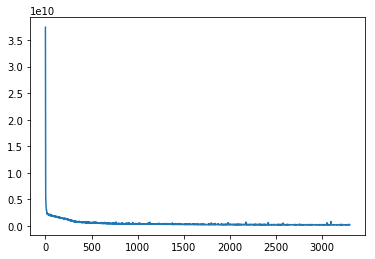

In [68]:
plt.plot(history.history['loss'])

In [70]:
def grid_serach(batch_size,epochs):
    g_model = KerasRegressor(build_fn=create_model)
    
    param_grid = dict(batch_size=batch_size,epochs=epochs)

    grid = GridSearchCV(estimator=g_model, param_grid=param_grid, verbose=0, n_jobs=-1)

    start_time = time.time()
    result = grid.fit(X_train, y_train)
    end_time = time.time()

    for mean,stdev,param in zip(result.cv_results_['mean_test_score'],
                               result.cv_results_['std_test_score'],
                               result.cv_results_['params']):
        print("mean:{} stdev:{} params:{}".format(mean, stdev, param))
    print("Best score: {} Best params:{}".format(result.best_score_, result.best_params_))

    print("Cost time: {} s".format(end_time - start_time))

In [71]:
batch_size = [32]
epochs = list(range(3210, 3400, 10))

In [72]:
grid_serach(batch_size, epochs)

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/3240
1168/1168 [==============================] - 2s 1ms/step - loss: 37064019743.5616
Epoch 2/3240
1168/1168 [==============================] - 0s 58us/step - loss: 18310966819.0685
Epoch 3/3240
1168/1168 [==============================] - 0s 56us/step - loss: 5453720200.7671
Epoch 4/3240
1168/1168 [==============================] - 0s 56us/step - loss: 4753403420.0548
Epoch 5/3240
1168/1168 [==============================] - 0s 57us/step - loss: 3992552560.2192
Epoch 6/3240
1168/1168 [==============================] - 0s 57us/step - loss: 3476479652.8219
Epoch 7/3240
1168/1168 [==============================] - 0s 57us/step - loss: 3266087967.5616
Epoch 8/3240
1168/1168 [==============================] - 0s 56us/step - loss: 3076925625.8630
Epoch 9/3240
1168/1168 [==============================] - 0s 58us/step - loss: 2934421115.6164
Epoch 10/3240
1168/1168 [==============================] - 0s 57us/step - loss: 2886187044.8219
Epoch 11/3240
1168/1168 [=======================

1168/1168 [==============================] - 0s 55us/step - loss: 1515065673.6438
Epoch 171/3240
1168/1168 [==============================] - 0s 55us/step - loss: 1525511229.3699
Epoch 172/3240
1168/1168 [==============================] - 0s 56us/step - loss: 1474142351.7808
Epoch 173/3240
1168/1168 [==============================] - 0s 56us/step - loss: 1462634244.3836
Epoch 174/3240
1168/1168 [==============================] - 0s 56us/step - loss: 1501838035.2877
Epoch 175/3240
1168/1168 [==============================] - 0s 56us/step - loss: 1469528557.5890
Epoch 176/3240
1168/1168 [==============================] - 0s 56us/step - loss: 1478903353.8630
Epoch 177/3240
1168/1168 [==============================] - 0s 60us/step - loss: 1445041804.2740
Epoch 178/3240
1168/1168 [==============================] - 0s 56us/step - loss: 1498892869.2603
Epoch 179/3240
1168/1168 [==============================] - 0s 56us/step - loss: 1520146172.4932
Epoch 180/3240
1168/1168 [===================

1168/1168 [==============================] - 0s 57us/step - loss: 833353216.0000
Epoch 340/3240
1168/1168 [==============================] - 0s 56us/step - loss: 786796677.2603
Epoch 341/3240
1168/1168 [==============================] - 0s 57us/step - loss: 962159339.8356
Epoch 342/3240
1168/1168 [==============================] - 0s 56us/step - loss: 893573162.9589
Epoch 343/3240
1168/1168 [==============================] - 0s 56us/step - loss: 887302480.6575
Epoch 344/3240
1168/1168 [==============================] - 0s 56us/step - loss: 840047809.7534
Epoch 345/3240
1168/1168 [==============================] - 0s 56us/step - loss: 870687361.7534
Epoch 346/3240
1168/1168 [==============================] - 0s 56us/step - loss: 882124273.5342
Epoch 347/3240
1168/1168 [==============================] - 0s 56us/step - loss: 791442195.2877
Epoch 348/3240
1168/1168 [==============================] - 0s 57us/step - loss: 812788197.6986
Epoch 349/3240
1168/1168 [=============================

1168/1168 [==============================] - 0s 57us/step - loss: 666242399.1233
Epoch 510/3240
1168/1168 [==============================] - 0s 56us/step - loss: 695348829.3699
Epoch 511/3240
1168/1168 [==============================] - 0s 56us/step - loss: 668765909.9178
Epoch 512/3240
1168/1168 [==============================] - 0s 56us/step - loss: 675129959.8904
Epoch 513/3240
1168/1168 [==============================] - 0s 56us/step - loss: 692677580.2740
Epoch 514/3240
1168/1168 [==============================] - 0s 57us/step - loss: 672683386.7397
Epoch 515/3240
1168/1168 [==============================] - 0s 56us/step - loss: 664707928.5479
Epoch 516/3240
1168/1168 [==============================] - 0s 58us/step - loss: 670278079.1233
Epoch 517/3240
1168/1168 [==============================] - 0s 57us/step - loss: 671179962.7397
Epoch 518/3240
1168/1168 [==============================] - 0s 58us/step - loss: 650952312.5479
Epoch 519/3240
1168/1168 [=============================

1168/1168 [==============================] - 0s 55us/step - loss: 517667851.8356
Epoch 680/3240
1168/1168 [==============================] - 0s 55us/step - loss: 541718806.1370
Epoch 681/3240
1168/1168 [==============================] - 0s 55us/step - loss: 579644522.0822
Epoch 682/3240
1168/1168 [==============================] - 0s 55us/step - loss: 591856820.6027
Epoch 683/3240
1168/1168 [==============================] - 0s 56us/step - loss: 647657033.6438
Epoch 684/3240
1168/1168 [==============================] - 0s 55us/step - loss: 553499125.0411
Epoch 685/3240
1168/1168 [==============================] - 0s 55us/step - loss: 562213664.0000
Epoch 686/3240
1168/1168 [==============================] - 0s 56us/step - loss: 501194935.2329
Epoch 687/3240
1168/1168 [==============================] - 0s 56us/step - loss: 507971728.8767
Epoch 688/3240
1168/1168 [==============================] - 0s 56us/step - loss: 532615285.9178
Epoch 689/3240
1168/1168 [=============================

1168/1168 [==============================] - 0s 56us/step - loss: 461012248.3288
Epoch 850/3240
1168/1168 [==============================] - 0s 56us/step - loss: 449245566.2466
Epoch 851/3240
1168/1168 [==============================] - 0s 57us/step - loss: 561531041.3151
Epoch 852/3240
1168/1168 [==============================] - 0s 56us/step - loss: 521479598.0274
Epoch 853/3240
1168/1168 [==============================] - 0s 57us/step - loss: 506076888.1096
Epoch 854/3240
1168/1168 [==============================] - 0s 57us/step - loss: 546456154.3014
Epoch 855/3240
1168/1168 [==============================] - 0s 56us/step - loss: 455043032.5479
Epoch 856/3240
1168/1168 [==============================] - 0s 56us/step - loss: 475392020.6027
Epoch 857/3240
1168/1168 [==============================] - 0s 56us/step - loss: 425294641.0959
Epoch 858/3240
1168/1168 [==============================] - 0s 56us/step - loss: 549615368.7671
Epoch 859/3240
1168/1168 [=============================

1168/1168 [==============================] - 0s 57us/step - loss: 448465272.9863
Epoch 1020/3240
1168/1168 [==============================] - 0s 57us/step - loss: 419163398.1370
Epoch 1021/3240
1168/1168 [==============================] - 0s 57us/step - loss: 371169643.8356
Epoch 1022/3240
1168/1168 [==============================] - 0s 56us/step - loss: 395244984.1096
Epoch 1023/3240
1168/1168 [==============================] - 0s 56us/step - loss: 469709911.2329
Epoch 1024/3240
1168/1168 [==============================] - 0s 57us/step - loss: 453005831.0137
Epoch 1025/3240
1168/1168 [==============================] - 0s 57us/step - loss: 400248695.6712
Epoch 1026/3240
1168/1168 [==============================] - 0s 56us/step - loss: 439776696.1096
Epoch 1027/3240
1168/1168 [==============================] - 0s 58us/step - loss: 393929409.6438
Epoch 1028/3240
1168/1168 [==============================] - 0s 57us/step - loss: 475082728.7671
Epoch 1029/3240
1168/1168 [===================

1168/1168 [==============================] - 0s 55us/step - loss: 385697740.2740
Epoch 1188/3240
1168/1168 [==============================] - 0s 55us/step - loss: 362338728.3288
Epoch 1189/3240
1168/1168 [==============================] - 0s 55us/step - loss: 376268551.4521
Epoch 1190/3240
1168/1168 [==============================] - 0s 56us/step - loss: 419580275.7260
Epoch 1191/3240
1168/1168 [==============================] - 0s 55us/step - loss: 351833519.1233
Epoch 1192/3240
1168/1168 [==============================] - 0s 56us/step - loss: 447759980.2740
Epoch 1193/3240
1168/1168 [==============================] - 0s 55us/step - loss: 387736108.0548
Epoch 1194/3240
1168/1168 [==============================] - 0s 55us/step - loss: 370028086.3562
Epoch 1195/3240
1168/1168 [==============================] - 0s 56us/step - loss: 389024308.6027
Epoch 1196/3240
1168/1168 [==============================] - 0s 56us/step - loss: 345478645.0411
Epoch 1197/3240
1168/1168 [===================

1168/1168 [==============================] - 0s 55us/step - loss: 359735882.5205
Epoch 1356/3240
1168/1168 [==============================] - 0s 56us/step - loss: 366171190.3562
Epoch 1357/3240
1168/1168 [==============================] - 0s 55us/step - loss: 385973449.6438
Epoch 1358/3240
1168/1168 [==============================] - 0s 56us/step - loss: 410087769.4247
Epoch 1359/3240
1168/1168 [==============================] - 0s 56us/step - loss: 343134382.0274
Epoch 1360/3240
1168/1168 [==============================] - 0s 55us/step - loss: 425223876.3836
Epoch 1361/3240
1168/1168 [==============================] - 0s 55us/step - loss: 388556640.4384
Epoch 1362/3240
1168/1168 [==============================] - 0s 56us/step - loss: 492069504.4384
Epoch 1363/3240
1168/1168 [==============================] - 0s 56us/step - loss: 363788420.1644
Epoch 1364/3240
1168/1168 [==============================] - 0s 55us/step - loss: 332507243.8356
Epoch 1365/3240
1168/1168 [===================

1168/1168 [==============================] - 0s 56us/step - loss: 302752109.8082
Epoch 1524/3240
1168/1168 [==============================] - 0s 55us/step - loss: 398892335.7808
Epoch 1525/3240
1168/1168 [==============================] - 0s 56us/step - loss: 309808232.7671
Epoch 1526/3240
1168/1168 [==============================] - 0s 56us/step - loss: 323637541.2603
Epoch 1527/3240
1168/1168 [==============================] - 0s 55us/step - loss: 318047459.2877
Epoch 1528/3240
1168/1168 [==============================] - 0s 56us/step - loss: 331621921.9726
Epoch 1529/3240
1168/1168 [==============================] - 0s 55us/step - loss: 330758521.8630
Epoch 1530/3240
1168/1168 [==============================] - 0s 55us/step - loss: 383743245.3699
Epoch 1531/3240
1168/1168 [==============================] - 0s 55us/step - loss: 334146428.0548
Epoch 1532/3240
1168/1168 [==============================] - 0s 56us/step - loss: 341636788.1644
Epoch 1533/3240
1168/1168 [===================

1168/1168 [==============================] - 0s 56us/step - loss: 356933422.0274
Epoch 1692/3240
1168/1168 [==============================] - 0s 56us/step - loss: 287646080.0000
Epoch 1693/3240
1168/1168 [==============================] - 0s 56us/step - loss: 293154196.6027
Epoch 1694/3240
1168/1168 [==============================] - 0s 56us/step - loss: 281192462.9041
Epoch 1695/3240
1168/1168 [==============================] - 0s 56us/step - loss: 339402818.8493
Epoch 1696/3240
1168/1168 [==============================] - 0s 55us/step - loss: 287349251.9452
Epoch 1697/3240
1168/1168 [==============================] - 0s 57us/step - loss: 344967185.9726
Epoch 1698/3240
1168/1168 [==============================] - 0s 55us/step - loss: 347337681.0959
Epoch 1699/3240
1168/1168 [==============================] - 0s 55us/step - loss: 321057689.5890
Epoch 1700/3240
1168/1168 [==============================] - 0s 56us/step - loss: 367983190.7945
Epoch 1701/3240
1168/1168 [===================

1168/1168 [==============================] - 0s 59us/step - loss: 337559659.3973
Epoch 1860/3240
1168/1168 [==============================] - 0s 58us/step - loss: 320788856.7671
Epoch 1861/3240
1168/1168 [==============================] - 0s 57us/step - loss: 301808238.6849
Epoch 1862/3240
1168/1168 [==============================] - 0s 57us/step - loss: 347266521.6438
Epoch 1863/3240
1168/1168 [==============================] - 0s 57us/step - loss: 312545827.9452
Epoch 1864/3240
1168/1168 [==============================] - 0s 57us/step - loss: 289610043.8356
Epoch 1865/3240
1168/1168 [==============================] - 0s 57us/step - loss: 310342687.1233
Epoch 1866/3240
1168/1168 [==============================] - 0s 57us/step - loss: 290097982.6849
Epoch 1867/3240
1168/1168 [==============================] - 0s 57us/step - loss: 274996832.1096
Epoch 1868/3240
1168/1168 [==============================] - 0s 58us/step - loss: 280295114.0822
Epoch 1869/3240
1168/1168 [===================

1168/1168 [==============================] - 0s 57us/step - loss: 296999199.5616
Epoch 2028/3240
1168/1168 [==============================] - 0s 57us/step - loss: 263427247.3425
Epoch 2029/3240
1168/1168 [==============================] - 0s 56us/step - loss: 253826002.4110
Epoch 2030/3240
1168/1168 [==============================] - 0s 56us/step - loss: 299244627.5616
Epoch 2031/3240
1168/1168 [==============================] - 0s 57us/step - loss: 310280939.3973
Epoch 2032/3240
1168/1168 [==============================] - 0s 55us/step - loss: 339403219.7260
Epoch 2033/3240
1168/1168 [==============================] - 0s 57us/step - loss: 276883517.5890
Epoch 2034/3240
1168/1168 [==============================] - 0s 57us/step - loss: 312670933.9178
Epoch 2035/3240
1168/1168 [==============================] - 0s 57us/step - loss: 345011271.4521
Epoch 2036/3240
1168/1168 [==============================] - 0s 56us/step - loss: 304219389.5890
Epoch 2037/3240
1168/1168 [===================

1168/1168 [==============================] - 0s 56us/step - loss: 268213499.6164
Epoch 2196/3240
1168/1168 [==============================] - 0s 56us/step - loss: 252578417.4247
Epoch 2197/3240
1168/1168 [==============================] - 0s 56us/step - loss: 279039457.7534
Epoch 2198/3240
1168/1168 [==============================] - 0s 55us/step - loss: 271720679.0137
Epoch 2199/3240
1168/1168 [==============================] - 0s 55us/step - loss: 307295503.7808
Epoch 2200/3240
1168/1168 [==============================] - 0s 55us/step - loss: 285061747.9452
Epoch 2201/3240
1168/1168 [==============================] - 0s 56us/step - loss: 244722357.2603
Epoch 2202/3240
1168/1168 [==============================] - 0s 56us/step - loss: 338887250.4110
Epoch 2203/3240
1168/1168 [==============================] - 0s 57us/step - loss: 292323065.6438
Epoch 2204/3240
1168/1168 [==============================] - 0s 55us/step - loss: 261184509.8082
Epoch 2205/3240
1168/1168 [===================

1168/1168 [==============================] - 0s 56us/step - loss: 315446320.6575
Epoch 2364/3240
1168/1168 [==============================] - 0s 56us/step - loss: 283053073.9726
Epoch 2365/3240
1168/1168 [==============================] - 0s 56us/step - loss: 277928696.3288
Epoch 2366/3240
1168/1168 [==============================] - 0s 56us/step - loss: 265464501.9178
Epoch 2367/3240
1168/1168 [==============================] - 0s 56us/step - loss: 304969734.3562
Epoch 2368/3240
1168/1168 [==============================] - 0s 56us/step - loss: 304044532.1644
Epoch 2369/3240
1168/1168 [==============================] - 0s 56us/step - loss: 260647163.3973
Epoch 2370/3240
1168/1168 [==============================] - 0s 56us/step - loss: 263945202.8493
Epoch 2371/3240
1168/1168 [==============================] - 0s 56us/step - loss: 308358747.1781
Epoch 2372/3240
1168/1168 [==============================] - 0s 56us/step - loss: 356247516.4932
Epoch 2373/3240
1168/1168 [===================

1168/1168 [==============================] - 0s 56us/step - loss: 237435715.0685
Epoch 2532/3240
1168/1168 [==============================] - 0s 55us/step - loss: 263366670.0274
Epoch 2533/3240
1168/1168 [==============================] - 0s 55us/step - loss: 230955577.8630
Epoch 2534/3240
1168/1168 [==============================] - 0s 56us/step - loss: 258260524.7123
Epoch 2535/3240
1168/1168 [==============================] - 0s 55us/step - loss: 306602658.6301
Epoch 2536/3240
1168/1168 [==============================] - 0s 55us/step - loss: 279630579.1781
Epoch 2537/3240
1168/1168 [==============================] - 0s 55us/step - loss: 274229033.0959
Epoch 2538/3240
1168/1168 [==============================] - 0s 55us/step - loss: 243682585.5342
Epoch 2539/3240
1168/1168 [==============================] - 0s 55us/step - loss: 253366090.0822
Epoch 2540/3240
1168/1168 [==============================] - 0s 55us/step - loss: 342964239.5616
Epoch 2541/3240
1168/1168 [===================

1168/1168 [==============================] - 0s 56us/step - loss: 268184633.4247
Epoch 2700/3240
1168/1168 [==============================] - 0s 56us/step - loss: 282895210.0822
Epoch 2701/3240
1168/1168 [==============================] - 0s 56us/step - loss: 418496727.6712
Epoch 2702/3240
1168/1168 [==============================] - 0s 56us/step - loss: 361842932.8219
Epoch 2703/3240
1168/1168 [==============================] - 0s 58us/step - loss: 273163118.4658
Epoch 2704/3240
1168/1168 [==============================] - 0s 56us/step - loss: 241156919.8904
Epoch 2705/3240
1168/1168 [==============================] - 0s 56us/step - loss: 270726430.9041
Epoch 2706/3240
1168/1168 [==============================] - 0s 57us/step - loss: 254545388.7123
Epoch 2707/3240
1168/1168 [==============================] - 0s 57us/step - loss: 271652856.9863
Epoch 2708/3240
1168/1168 [==============================] - 0s 56us/step - loss: 288835403.8356
Epoch 2709/3240
1168/1168 [===================

1168/1168 [==============================] - 0s 57us/step - loss: 266931886.6849
Epoch 2868/3240
1168/1168 [==============================] - 0s 57us/step - loss: 235080663.4521
Epoch 2869/3240
1168/1168 [==============================] - 0s 57us/step - loss: 225165522.7945
Epoch 2870/3240
1168/1168 [==============================] - 0s 56us/step - loss: 215326010.9589
Epoch 2871/3240
1168/1168 [==============================] - 0s 58us/step - loss: 899272598.5753
Epoch 2872/3240
1168/1168 [==============================] - 0s 57us/step - loss: 327413416.7671
Epoch 2873/3240
1168/1168 [==============================] - 0s 56us/step - loss: 243335869.5890
Epoch 2874/3240
1168/1168 [==============================] - 0s 57us/step - loss: 259709593.8630
Epoch 2875/3240
1168/1168 [==============================] - 0s 55us/step - loss: 269159503.0137
Epoch 2876/3240
1168/1168 [==============================] - 0s 57us/step - loss: 235844383.8904
Epoch 2877/3240
1168/1168 [===================

1168/1168 [==============================] - 0s 56us/step - loss: 335578420.8219
Epoch 3036/3240
1168/1168 [==============================] - 0s 55us/step - loss: 267427021.5890
Epoch 3037/3240
1168/1168 [==============================] - 0s 56us/step - loss: 245881261.5890
Epoch 3038/3240
1168/1168 [==============================] - 0s 55us/step - loss: 207974813.8082
Epoch 3039/3240
1168/1168 [==============================] - 0s 55us/step - loss: 226742502.1370
Epoch 3040/3240
1168/1168 [==============================] - 0s 56us/step - loss: 254631226.0822
Epoch 3041/3240
1168/1168 [==============================] - 0s 55us/step - loss: 242931475.5068
Epoch 3042/3240
1168/1168 [==============================] - 0s 56us/step - loss: 235593651.9452
Epoch 3043/3240
1168/1168 [==============================] - 0s 57us/step - loss: 270150585.8630
Epoch 3044/3240
1168/1168 [==============================] - 0s 56us/step - loss: 285899899.6164
Epoch 3045/3240
1168/1168 [===================

1168/1168 [==============================] - 0s 56us/step - loss: 274080380.4932
Epoch 3204/3240
1168/1168 [==============================] - 0s 56us/step - loss: 234045249.3151
Epoch 3205/3240
1168/1168 [==============================] - 0s 56us/step - loss: 223580915.9452
Epoch 3206/3240
1168/1168 [==============================] - 0s 57us/step - loss: 225117057.0959
Epoch 3207/3240
1168/1168 [==============================] - 0s 56us/step - loss: 223615306.5205
Epoch 3208/3240
1168/1168 [==============================] - 0s 56us/step - loss: 225131355.6164
Epoch 3209/3240
1168/1168 [==============================] - 0s 56us/step - loss: 241539188.6027
Epoch 3210/3240
1168/1168 [==============================] - 0s 55us/step - loss: 223014024.1096
Epoch 3211/3240
1168/1168 [==============================] - 0s 55us/step - loss: 204922676.1644
Epoch 3212/3240
1168/1168 [==============================] - 0s 56us/step - loss: 214186416.6575
Epoch 3213/3240
1168/1168 [===================

In [73]:
def model_fit(batch_size, epochs):
    model = create_model()

    start_time = time.time()
    history = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=0)
    end_time = time.time()

    print("Cost time: {} s".format(end_time - start_time))
    benchmark(model)
    plt.plot(history.history['loss'])
    

Cost time: 205.95287370681763 s
RMSE: 26899.35087406971 
LOGRMSE: 0.12528533279977327


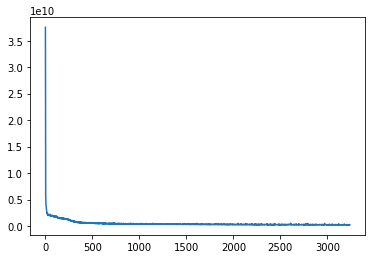

In [76]:
# Best score: -1381949806.0547945 Best params:{'batch_size': 32, 'epochs': 3240}
# cv = 5
model_fit(32,3240)

## log_y

In [77]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(200,activation="relu")) 
    model.add(Dropout(0.2))
    model.add(Dense(30, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [78]:
def grid_serach(batch_size,epochs,X_train, y_log_train):
    g_model = KerasRegressor(build_fn=create_model)
    
    param_grid = dict(batch_size=batch_size,epochs=epochs)

    grid = GridSearchCV(estimator=g_model, param_grid=param_grid, verbose=0, n_jobs=-1)

    start_time = time.time()
    result = grid.fit(X_train, y_log_train)
    end_time = time.time()

    for mean,stdev,param in zip(result.cv_results_['mean_test_score'],
                               result.cv_results_['std_test_score'],
                               result.cv_results_['params']):
        print("mean:{} stdev:{} params:{}".format(mean, stdev, param))
    print("Best score: {} Best params:{}".format(result.best_score_, result.best_params_))

    print("Cost time: {} s".format(end_time - start_time))

In [79]:
y_log_train = y_train.copy()
y_log_train = np.log(y_train)

batch_size = [16, 24, 32, 48, 64]
epochs = [100,500,1000,1500,2000,2500,3000,3500]

In [80]:
grid_serach(batch_size,epochs,X_train, y_log_train)

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/500
1168/1168 [==============================] - 1s 1ms/step - loss: 38236.9716
Epoch 2/500
1168/1168 [==============================] - 0s 38us/step - loss: 7439.2766
Epoch 3/500
1168/1168 [==============================] - 0s 38us/step - loss: 5327.5089
Epoch 4/500
1168/1168 [==============================] - 0s 38us/step - loss: 3335.9210
Epoch 5/500
1168/1168 [==============================] - 0s 38us/step - loss: 1704.1734
Epoch 6/500
1168/1168 [==============================] - 0s 37us/step - loss: 1259.7881
Epoch 7/500
1168/1168 [==============================] - 0s 38us/step - loss: 981.0912
Epoch 8/500
1168/1168 [==============================] - 0s 38us/step - loss: 885.3452
Epoch 9/500
1168/1168 [==============================] - 0s 38us/step - loss: 1218.9656
Epoch 10/500
1168/1168 [==============================] - 0s 38us/step - loss: 3313.6219
Epoch 11/500
1168/1168 [==============================] - 0s 38us/step - loss: 1214.5899
Epoch 12/500
1168/1168 [========

1168/1168 [==============================] - 0s 40us/step - loss: 3.7361
Epoch 189/500
1168/1168 [==============================] - 0s 40us/step - loss: 4.3322
Epoch 190/500
1168/1168 [==============================] - 0s 41us/step - loss: 2.7978
Epoch 191/500
1168/1168 [==============================] - 0s 40us/step - loss: 2.9013
Epoch 192/500
1168/1168 [==============================] - 0s 40us/step - loss: 2.4912
Epoch 193/500
1168/1168 [==============================] - 0s 40us/step - loss: 2.9325
Epoch 194/500
1168/1168 [==============================] - 0s 40us/step - loss: 2.7242
Epoch 195/500
1168/1168 [==============================] - 0s 39us/step - loss: 3.1259
Epoch 196/500
1168/1168 [==============================] - 0s 40us/step - loss: 2.3799
Epoch 197/500
1168/1168 [==============================] - 0s 40us/step - loss: 3.2315
Epoch 198/500
1168/1168 [==============================] - 0s 39us/step - loss: 2.6998
Epoch 199/500
1168/1168 [==============================] 

1168/1168 [==============================] - 0s 37us/step - loss: 0.6067
Epoch 377/500
1168/1168 [==============================] - 0s 38us/step - loss: 0.5934
Epoch 378/500
1168/1168 [==============================] - 0s 37us/step - loss: 0.5919
Epoch 379/500
1168/1168 [==============================] - 0s 37us/step - loss: 0.9136
Epoch 380/500
1168/1168 [==============================] - 0s 37us/step - loss: 0.6298
Epoch 381/500
1168/1168 [==============================] - 0s 38us/step - loss: 0.7567
Epoch 382/500
1168/1168 [==============================] - 0s 37us/step - loss: 0.6945
Epoch 383/500
1168/1168 [==============================] - 0s 37us/step - loss: 0.7156
Epoch 384/500
1168/1168 [==============================] - 0s 38us/step - loss: 0.6886
Epoch 385/500
1168/1168 [==============================] - 0s 37us/step - loss: 0.7351
Epoch 386/500
1168/1168 [==============================] - 0s 37us/step - loss: 0.7140
Epoch 387/500
1168/1168 [==============================] 

In [81]:
# Best score: -0.18439217313505352 Best params:{'batch_size': 48, 'epochs': 500}

In [83]:
def model_fit(batch_size, epochs, X_train, y_train, X_test):
    model = create_model()

    start_time = time.time()
    history = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=0)
    end_time = time.time()
    print("Cost time: {} s".format(end_time - start_time))

    log_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, np.exp(log_pred)))
    logrmse = np.sqrt(mean_squared_error(np.log(y_test), log_pred))
    print("RMSE: {} \nLOGRMSE: {}".format(rmse, logrmse))
    
    plt.plot(history.history['loss'])

Cost time: 23.854161739349365 s
RMSE: 345939.7495872324 
LOGRMSE: 0.31064038450113757


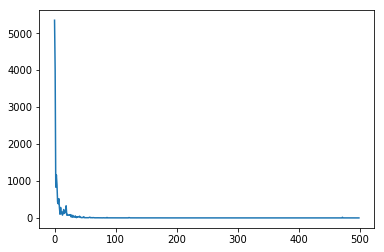

In [86]:
model_fit(48, 500, X_train, y_log_train, X_test)

In [87]:
batch_size = [40,46, 48, 50,]
epochs = [300,400,500,600,700,800,900,1000]

In [88]:
grid_serach(batch_size,epochs,X_train, y_log_train)

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/300
1168/1168 [==============================] - 2s 1ms/step - loss: 1297.2016
Epoch 2/300
1168/1168 [==============================] - 0s 39us/step - loss: 1050.5854
Epoch 3/300
1168/1168 [==============================] - 0s 41us/step - loss: 563.6026
Epoch 4/300
1168/1168 [==============================] - 0s 40us/step - loss: 1475.0841
Epoch 5/300
1168/1168 [==============================] - 0s 41us/step - loss: 730.0680
Epoch 6/300
1168/1168 [==============================] - 0s 41us/step - loss: 428.5393
Epoch 7/300
1168/1168 [==============================] - 0s 40us/step - loss: 69.3550
Epoch 8/300
1168/1168 [==============================] - 0s 40us/step - loss: 83.1642
Epoch 9/300
1168/1168 [==============================] - 0s 40us/step - loss: 36.3105
Epoch 10/300
1168/1168 [==============================] - 0s 41us/step - loss: 36.3914
Epoch 11/300
1168/1168 [==============================] - 0s 41us/step - loss: 34.7699
Epoch 12/300
1168/1168 [====================

Epoch 96/300
1168/1168 [==============================] - 0s 41us/step - loss: 0.8905
Epoch 97/300
1168/1168 [==============================] - 0s 40us/step - loss: 1.1057
Epoch 98/300
1168/1168 [==============================] - 0s 43us/step - loss: 0.8290
Epoch 99/300
1168/1168 [==============================] - 0s 40us/step - loss: 1.0657
Epoch 100/300
1168/1168 [==============================] - 0s 40us/step - loss: 0.8377
Epoch 101/300
1168/1168 [==============================] - 0s 40us/step - loss: 0.7691
Epoch 102/300
1168/1168 [==============================] - 0s 40us/step - loss: 2.2322
Epoch 103/300
1168/1168 [==============================] - 0s 40us/step - loss: 0.8934
Epoch 104/300
1168/1168 [==============================] - 0s 40us/step - loss: 0.8767
Epoch 105/300
1168/1168 [==============================] - 0s 40us/step - loss: 0.9223
Epoch 106/300
1168/1168 [==============================] - 0s 40us/step - loss: 0.9339
Epoch 107/300
1168/1168 [======================

1168/1168 [==============================] - 0s 40us/step - loss: 0.2775
Epoch 285/300
1168/1168 [==============================] - 0s 40us/step - loss: 0.3220
Epoch 286/300
1168/1168 [==============================] - 0s 40us/step - loss: 0.2956
Epoch 287/300
1168/1168 [==============================] - 0s 41us/step - loss: 0.2813
Epoch 288/300
1168/1168 [==============================] - 0s 40us/step - loss: 0.2804
Epoch 289/300
1168/1168 [==============================] - 0s 40us/step - loss: 0.2526
Epoch 290/300
1168/1168 [==============================] - 0s 39us/step - loss: 0.2481
Epoch 291/300
1168/1168 [==============================] - 0s 40us/step - loss: 0.2717
Epoch 292/300
1168/1168 [==============================] - 0s 40us/step - loss: 0.2705
Epoch 293/300
1168/1168 [==============================] - 0s 41us/step - loss: 0.2408
Epoch 294/300
1168/1168 [==============================] - 0s 41us/step - loss: 0.2349
Epoch 295/300
1168/1168 [==============================] 

Cost time: 16.23319149017334 s
RMSE: 167450.1589760863 
LOGRMSE: 1.8002040182672627


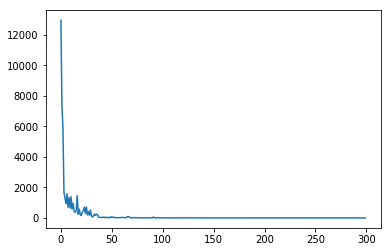

In [89]:
# Best score: -0.19289244726867963 Best params:{'batch_size': 46, 'epochs': 300}
model_fit(46, 300, X_train, y_log_train, X_test)

In [90]:
def create_model():
    model = Sequential()
    model.add(Dense(20, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(100,activation="relu")) 
    model.add(Dropout(0.2))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [91]:
batch_size = [16, 24, 32, 48, 64]
epochs = [100,500,1000,1500,2000,2500,3000,3500]

In [94]:
grid_serach(batch_size,epochs,X_train, y_log_train)

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/3500
1168/1168 [==============================] - 2s 2ms/step - loss: 20700.8736
Epoch 2/3500
1168/1168 [==============================] - 0s 70us/step - loss: 592.3997
Epoch 3/3500
1168/1168 [==============================] - 0s 68us/step - loss: 210.7945
Epoch 4/3500
1168/1168 [==============================] - 0s 68us/step - loss: 167.2854
Epoch 5/3500
1168/1168 [==============================] - 0s 69us/step - loss: 153.5606
Epoch 6/3500
1168/1168 [==============================] - 0s 68us/step - loss: 164.9535
Epoch 7/3500
1168/1168 [==============================] - 0s 67us/step - loss: 157.2151
Epoch 8/3500
1168/1168 [==============================] - 0s 69us/step - loss: 136.9512
Epoch 9/3500
1168/1168 [==============================] - 0s 69us/step - loss: 128.6722
Epoch 10/3500
1168/1168 [==============================] - 0s 67us/step - loss: 95.1098
Epoch 11/3500
1168/1168 [==============================] - 0s 68us/step - loss: 60.1096
Epoch 12/3500
1168/1168 [======

1168/1168 [==============================] - 0s 68us/step - loss: 1.6274
Epoch 188/3500
1168/1168 [==============================] - 0s 68us/step - loss: 1.4083
Epoch 189/3500
1168/1168 [==============================] - 0s 68us/step - loss: 1.4745
Epoch 190/3500
1168/1168 [==============================] - 0s 68us/step - loss: 1.3212
Epoch 191/3500
1168/1168 [==============================] - 0s 68us/step - loss: 1.4259
Epoch 192/3500
1168/1168 [==============================] - 0s 68us/step - loss: 1.3845
Epoch 193/3500
1168/1168 [==============================] - 0s 69us/step - loss: 1.5527
Epoch 194/3500
1168/1168 [==============================] - 0s 69us/step - loss: 1.5908
Epoch 195/3500
1168/1168 [==============================] - 0s 68us/step - loss: 1.5344
Epoch 196/3500
1168/1168 [==============================] - 0s 69us/step - loss: 1.4730
Epoch 197/3500
1168/1168 [==============================] - 0s 69us/step - loss: 1.5489
Epoch 198/3500
1168/1168 [=====================

1168/1168 [==============================] - 0s 69us/step - loss: 0.7440
Epoch 374/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.6569
Epoch 375/3500
1168/1168 [==============================] - 0s 73us/step - loss: 0.6917
Epoch 376/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.8193
Epoch 377/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.6557
Epoch 378/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.7179
Epoch 379/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.6120
Epoch 380/3500
1168/1168 [==============================] - 0s 71us/step - loss: 0.6518
Epoch 381/3500
1168/1168 [==============================] - 0s 71us/step - loss: 0.7155
Epoch 382/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.7900
Epoch 383/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.7239
Epoch 384/3500
1168/1168 [=====================

1168/1168 [==============================] - 0s 70us/step - loss: 0.3792
Epoch 560/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.3459
Epoch 561/3500
1168/1168 [==============================] - 0s 71us/step - loss: 0.3728
Epoch 562/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.3499
Epoch 563/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.3439
Epoch 564/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.3671
Epoch 565/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.3620
Epoch 566/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.3288
Epoch 567/3500
1168/1168 [==============================] - 0s 71us/step - loss: 0.3496
Epoch 568/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.3234
Epoch 569/3500
1168/1168 [==============================] - 0s 73us/step - loss: 0.3494
Epoch 570/3500
1168/1168 [=====================

1168/1168 [==============================] - 0s 70us/step - loss: 0.1877
Epoch 746/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.2023
Epoch 747/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.2054
Epoch 748/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.2143
Epoch 749/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.2071
Epoch 750/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.2389
Epoch 751/3500
1168/1168 [==============================] - 0s 71us/step - loss: 0.2015
Epoch 752/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.2024
Epoch 753/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.2015
Epoch 754/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.2131
Epoch 755/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.2056
Epoch 756/3500
1168/1168 [=====================

1168/1168 [==============================] - 0s 68us/step - loss: 0.1083
Epoch 932/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.1097
Epoch 933/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.1115
Epoch 934/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.1143
Epoch 935/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.1111
Epoch 936/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.1126
Epoch 937/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.1195
Epoch 938/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.1068
Epoch 939/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.1211
Epoch 940/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.1204
Epoch 941/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.1016
Epoch 942/3500
1168/1168 [=====================

Epoch 1024/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0757
Epoch 1025/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0793
Epoch 1026/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0820
Epoch 1027/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0757
Epoch 1028/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0726
Epoch 1029/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0737
Epoch 1030/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0734
Epoch 1031/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0764
Epoch 1032/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0739
Epoch 1033/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0663
Epoch 1034/3500
1168/1168 [==============================] - 0s 78us/step - loss: 0.0735
Epoch 1035/3500
1168/

1168/1168 [==============================] - 0s 67us/step - loss: 0.0450
Epoch 1117/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0521
Epoch 1118/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0522
Epoch 1119/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0438
Epoch 1120/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0452
Epoch 1121/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0497
Epoch 1122/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0471
Epoch 1123/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0389
Epoch 1124/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0444
Epoch 1125/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0448
Epoch 1126/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0439
Epoch 1127/3500
1168/1168 [==========

1168/1168 [==============================] - 0s 68us/step - loss: 0.0326
Epoch 1301/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0361
Epoch 1302/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0360
Epoch 1303/3500
1168/1168 [==============================] - 0s 66us/step - loss: 0.0323
Epoch 1304/3500
1168/1168 [==============================] - 0s 65us/step - loss: 0.0323
Epoch 1305/3500
1168/1168 [==============================] - 0s 66us/step - loss: 0.0268
Epoch 1306/3500
1168/1168 [==============================] - 0s 67us/step - loss: 0.0259
Epoch 1307/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0233
Epoch 1308/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0261
Epoch 1309/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0238
Epoch 1310/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0219
Epoch 1311/3500
1168/1168 [==========

1168/1168 [==============================] - 0s 68us/step - loss: 0.0193
Epoch 1485/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0233
Epoch 1486/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0326
Epoch 1487/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0237
Epoch 1488/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0235
Epoch 1489/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0216
Epoch 1490/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0210
Epoch 1491/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0202
Epoch 1492/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0198
Epoch 1493/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0221
Epoch 1494/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0247
Epoch 1495/3500
1168/1168 [==========

1168/1168 [==============================] - 0s 70us/step - loss: 0.0176
Epoch 1669/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0202
Epoch 1670/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0221
Epoch 1671/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0202
Epoch 1672/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0218
Epoch 1673/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0199
Epoch 1674/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0237
Epoch 1675/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0237
Epoch 1676/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0217
Epoch 1677/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0193
Epoch 1678/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0206
Epoch 1679/3500
1168/1168 [==========

1168/1168 [==============================] - 0s 69us/step - loss: 0.0205
Epoch 1853/3500
1168/1168 [==============================] - 0s 72us/step - loss: 0.0388
Epoch 1854/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0377
Epoch 1855/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0283
Epoch 1856/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0264
Epoch 1857/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0245
Epoch 1858/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0243
Epoch 1859/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0231
Epoch 1860/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0240
Epoch 1861/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0225
Epoch 1862/3500
1168/1168 [==============================] - 0s 71us/step - loss: 0.0230
Epoch 1863/3500
1168/1168 [==========

1168/1168 [==============================] - 0s 69us/step - loss: 0.0192
Epoch 2037/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0171
Epoch 2038/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0198
Epoch 2039/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0217
Epoch 2040/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0202
Epoch 2041/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0181
Epoch 2042/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0189
Epoch 2043/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0178
Epoch 2044/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0183
Epoch 2045/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0187
Epoch 2046/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0229
Epoch 2047/3500
1168/1168 [==========

1168/1168 [==============================] - 0s 69us/step - loss: 0.0127
Epoch 2221/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0141
Epoch 2222/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0157
Epoch 2223/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0136
Epoch 2224/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0155
Epoch 2225/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0133
Epoch 2226/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0178
Epoch 2227/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0172
Epoch 2228/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0152
Epoch 2229/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0136
Epoch 2230/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0143
Epoch 2231/3500
1168/1168 [==========

1168/1168 [==============================] - 0s 69us/step - loss: 0.0127
Epoch 2405/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0120
Epoch 2406/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0118
Epoch 2407/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0120
Epoch 2408/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0118
Epoch 2409/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0121
Epoch 2410/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0119
Epoch 2411/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0130
Epoch 2412/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0150
Epoch 2413/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0134
Epoch 2414/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0151
Epoch 2415/3500
1168/1168 [==========

1168/1168 [==============================] - 0s 69us/step - loss: 0.0121
Epoch 2589/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0121
Epoch 2590/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0122
Epoch 2591/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0126
Epoch 2592/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0121
Epoch 2593/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0181
Epoch 2594/3500
1168/1168 [==============================] - 0s 67us/step - loss: 0.0401
Epoch 2595/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0322
Epoch 2596/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0193
Epoch 2597/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0170
Epoch 2598/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0118
Epoch 2599/3500
1168/1168 [==========

1168/1168 [==============================] - 0s 68us/step - loss: 0.0132
Epoch 2773/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0132
Epoch 2774/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0162
Epoch 2775/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0158
Epoch 2776/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0127
Epoch 2777/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0131
Epoch 2778/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0147
Epoch 2779/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0133
Epoch 2780/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0132
Epoch 2781/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0120
Epoch 2782/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0131
Epoch 2783/3500
1168/1168 [==========

1168/1168 [==============================] - 0s 70us/step - loss: 0.0121
Epoch 2957/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0136
Epoch 2958/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0173
Epoch 2959/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0132
Epoch 2960/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0134
Epoch 2961/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0130
Epoch 2962/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0199
Epoch 2963/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0156
Epoch 2964/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0130
Epoch 2965/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0158
Epoch 2966/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0134
Epoch 2967/3500
1168/1168 [==========

1168/1168 [==============================] - 0s 68us/step - loss: 0.0155
Epoch 3141/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0165
Epoch 3142/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0148
Epoch 3143/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0176
Epoch 3144/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0187
Epoch 3145/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0147
Epoch 3146/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0167
Epoch 3147/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0138
Epoch 3148/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0143
Epoch 3149/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0140
Epoch 3150/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0192
Epoch 3151/3500
1168/1168 [==========

1168/1168 [==============================] - 0s 68us/step - loss: 0.0113
Epoch 3325/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0148
Epoch 3326/3500
1168/1168 [==============================] - 0s 68us/step - loss: 0.0197
Epoch 3327/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0127
Epoch 3328/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0145
Epoch 3329/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0125
Epoch 3330/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0173
Epoch 3331/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0125
Epoch 3332/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0116
Epoch 3333/3500
1168/1168 [==============================] - 0s 69us/step - loss: 0.0122
Epoch 3334/3500
1168/1168 [==============================] - 0s 70us/step - loss: 0.0127
Epoch 3335/3500
1168/1168 [==========

Cost time: 277.4866876602173 s
RMSE: 41150.942721314845 
LOGRMSE: 0.16436461886705608


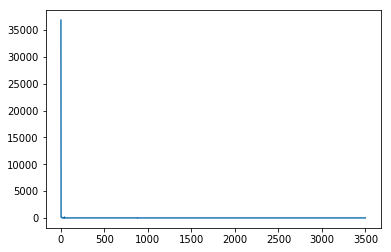

In [95]:
# Best score: -0.03393799203211977 Best params:{'batch_size': 24, 'epochs': 3500}
model_fit(24,3500, X_train, y_log_train, X_test)

In [96]:
batch_size = [22, 24, 26, 28, 30]
epochs = [3100,3200,3000,3400,3500,3600,3700,3800,3900,4000]
grid_serach(batch_size,epochs,X_train, y_log_train)

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/3100
1168/1168 [==============================] - 2s 2ms/step - loss: 24504.9390
Epoch 2/3100
1168/1168 [==============================] - 0s 66us/step - loss: 13298.0714
Epoch 3/3100
1168/1168 [==============================] - 0s 67us/step - loss: 4177.8097
Epoch 4/3100
1168/1168 [==============================] - 0s 65us/step - loss: 2192.5513
Epoch 5/3100
1168/1168 [==============================] - 0s 65us/step - loss: 1391.2284
Epoch 6/3100
1168/1168 [==============================] - 0s 67us/step - loss: 1540.1453
Epoch 7/3100
1168/1168 [==============================] - 0s 66us/step - loss: 2536.0693
Epoch 8/3100
1168/1168 [==============================] - 0s 66us/step - loss: 5986.8887
Epoch 9/3100
1168/1168 [==============================] - 0s 66us/step - loss: 1707.1970
Epoch 10/3100
1168/1168 [==============================] - 0s 65us/step - loss: 816.6325
Epoch 11/3100
1168/1168 [==============================] - 0s 66us/step - loss: 888.4384
Epoch 12/3100
1168/1

1168/1168 [==============================] - 0s 65us/step - loss: 1.7036
Epoch 187/3100
1168/1168 [==============================] - 0s 65us/step - loss: 1.8200
Epoch 188/3100
1168/1168 [==============================] - 0s 66us/step - loss: 1.7608
Epoch 189/3100
1168/1168 [==============================] - 0s 65us/step - loss: 1.7363
Epoch 190/3100
1168/1168 [==============================] - 0s 65us/step - loss: 1.8836
Epoch 191/3100
1168/1168 [==============================] - 0s 65us/step - loss: 1.7350
Epoch 192/3100
1168/1168 [==============================] - 0s 65us/step - loss: 4.2898
Epoch 193/3100
1168/1168 [==============================] - 0s 70us/step - loss: 4.6950
Epoch 194/3100
1168/1168 [==============================] - 0s 68us/step - loss: 3.4608
Epoch 195/3100
1168/1168 [==============================] - 0s 67us/step - loss: 2.2227
Epoch 196/3100
1168/1168 [==============================] - 0s 66us/step - loss: 2.0001
Epoch 197/3100
1168/1168 [=====================

1168/1168 [==============================] - 0s 65us/step - loss: 0.5760
Epoch 373/3100
1168/1168 [==============================] - 0s 64us/step - loss: 0.6459
Epoch 374/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.5562
Epoch 375/3100
1168/1168 [==============================] - 0s 64us/step - loss: 0.5897
Epoch 376/3100
1168/1168 [==============================] - 0s 64us/step - loss: 0.5898
Epoch 377/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.5017
Epoch 378/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.5375
Epoch 379/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.5354
Epoch 380/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.5213
Epoch 381/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.5300
Epoch 382/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.5445
Epoch 383/3100
1168/1168 [=====================

1168/1168 [==============================] - 0s 68us/step - loss: 0.0484
Epoch 559/3100
1168/1168 [==============================] - 0s 68us/step - loss: 0.0606
Epoch 560/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.0572
Epoch 561/3100
1168/1168 [==============================] - 0s 68us/step - loss: 0.0618
Epoch 562/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.0518
Epoch 563/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.0523
Epoch 564/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.0582
Epoch 565/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0483
Epoch 566/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.0503
Epoch 567/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0631
Epoch 568/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0639
Epoch 569/3100
1168/1168 [=====================

1168/1168 [==============================] - 0s 65us/step - loss: 0.0391
Epoch 745/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0360
Epoch 746/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0366
Epoch 747/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0393
Epoch 748/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0430
Epoch 749/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0547
Epoch 750/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0401
Epoch 751/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0381
Epoch 752/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0467
Epoch 753/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0551
Epoch 754/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0351
Epoch 755/3100
1168/1168 [=====================

1168/1168 [==============================] - 0s 66us/step - loss: 0.0330
Epoch 931/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0286
Epoch 932/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0438
Epoch 933/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.0348
Epoch 934/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0319
Epoch 935/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.0312
Epoch 936/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0331
Epoch 937/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0349
Epoch 938/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0311
Epoch 939/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0273
Epoch 940/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.0299
Epoch 941/3100
1168/1168 [=====================

1168/1168 [==============================] - 0s 66us/step - loss: 0.0314
Epoch 1024/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.0238
Epoch 1025/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0281
Epoch 1026/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0289
Epoch 1027/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0301
Epoch 1028/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0247
Epoch 1029/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0268
Epoch 1030/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0248
Epoch 1031/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0233
Epoch 1032/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0312
Epoch 1033/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0256
Epoch 1034/3100
1168/1168 [==========

1168/1168 [==============================] - 0s 67us/step - loss: 0.0257
Epoch 1208/3100
1168/1168 [==============================] - 0s 69us/step - loss: 0.0216
Epoch 1209/3100
1168/1168 [==============================] - 0s 68us/step - loss: 0.0218
Epoch 1210/3100
1168/1168 [==============================] - 0s 68us/step - loss: 0.0195
Epoch 1211/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0208
Epoch 1212/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0182
Epoch 1213/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0201
Epoch 1214/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0201
Epoch 1215/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0185
Epoch 1216/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0187
Epoch 1217/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.0260
Epoch 1218/3100
1168/1168 [==========

1168/1168 [==============================] - 0s 66us/step - loss: 0.0221
Epoch 1392/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0249
Epoch 1393/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0251
Epoch 1394/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0266
Epoch 1395/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0214
Epoch 1396/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0238
Epoch 1397/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0270
Epoch 1398/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.0220
Epoch 1399/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.0216
Epoch 1400/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0197
Epoch 1401/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.0241
Epoch 1402/3100
1168/1168 [==========

1168/1168 [==============================] - 0s 66us/step - loss: 0.0217
Epoch 1576/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0217
Epoch 1577/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0227
Epoch 1578/3100
1168/1168 [==============================] - 0s 64us/step - loss: 0.0195
Epoch 1579/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0234
Epoch 1580/3100
1168/1168 [==============================] - 0s 64us/step - loss: 0.0212
Epoch 1581/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0191
Epoch 1582/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0217
Epoch 1583/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0201
Epoch 1584/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0240
Epoch 1585/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0224
Epoch 1586/3100
1168/1168 [==========

1168/1168 [==============================] - 0s 65us/step - loss: 0.0583
Epoch 1760/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0359
Epoch 1761/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0262
Epoch 1762/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0265
Epoch 1763/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0276
Epoch 1764/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0345
Epoch 1765/3100
1168/1168 [==============================] - 0s 64us/step - loss: 0.0249
Epoch 1766/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0252
Epoch 1767/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0234
Epoch 1768/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.0235
Epoch 1769/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.0413
Epoch 1770/3100
1168/1168 [==========

1168/1168 [==============================] - 0s 65us/step - loss: 0.1629
Epoch 1944/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1629
Epoch 1945/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1630
Epoch 1946/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.1625
Epoch 1947/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.1621
Epoch 1948/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.1627
Epoch 1949/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.1626
Epoch 1950/3100
1168/1168 [==============================] - 0s 68us/step - loss: 0.1626
Epoch 1951/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1626
Epoch 1952/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1625
Epoch 1953/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1626
Epoch 1954/3100
1168/1168 [==========

1168/1168 [==============================] - 0s 65us/step - loss: 0.1625
Epoch 2128/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1626
Epoch 2129/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1625
Epoch 2130/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1626
Epoch 2131/3100
1168/1168 [==============================] - 0s 68us/step - loss: 0.1625
Epoch 2132/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1625
Epoch 2133/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1624
Epoch 2134/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1625
Epoch 2135/3100
1168/1168 [==============================] - 0s 64us/step - loss: 0.1624
Epoch 2136/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1634
Epoch 2137/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1631
Epoch 2138/3100
1168/1168 [==========

1168/1168 [==============================] - 0s 65us/step - loss: 0.1630
Epoch 2312/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1634
Epoch 2313/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1629
Epoch 2314/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1625
Epoch 2315/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1626
Epoch 2316/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1626
Epoch 2317/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.1627
Epoch 2318/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1625
Epoch 2319/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.1625
Epoch 2320/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1627
Epoch 2321/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1622
Epoch 2322/3100
1168/1168 [==========

1168/1168 [==============================] - 0s 66us/step - loss: 0.1626
Epoch 2496/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1624
Epoch 2497/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1629
Epoch 2498/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1625
Epoch 2499/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1627
Epoch 2500/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1629
Epoch 2501/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1627
Epoch 2502/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1629
Epoch 2503/3100
1168/1168 [==============================] - 0s 64us/step - loss: 0.1625
Epoch 2504/3100
1168/1168 [==============================] - 0s 64us/step - loss: 0.1625
Epoch 2505/3100
1168/1168 [==============================] - 0s 64us/step - loss: 0.1627
Epoch 2506/3100
1168/1168 [==========

1168/1168 [==============================] - 0s 65us/step - loss: 0.1627
Epoch 2680/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1626
Epoch 2681/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1634
Epoch 2682/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1626
Epoch 2683/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1624
Epoch 2684/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1627
Epoch 2685/3100
1168/1168 [==============================] - 0s 63us/step - loss: 0.1625
Epoch 2686/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1634
Epoch 2687/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1624
Epoch 2688/3100
1168/1168 [==============================] - 0s 69us/step - loss: 0.1623
Epoch 2689/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1626
Epoch 2690/3100
1168/1168 [==========

1168/1168 [==============================] - 0s 65us/step - loss: 0.1624
Epoch 2864/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1634
Epoch 2865/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1630
Epoch 2866/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1625
Epoch 2867/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.1626
Epoch 2868/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1630
Epoch 2869/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1625
Epoch 2870/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.1628
Epoch 2871/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1624
Epoch 2872/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1630
Epoch 2873/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1627
Epoch 2874/3100
1168/1168 [==========

1168/1168 [==============================] - 0s 65us/step - loss: 0.1628
Epoch 3048/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1626
Epoch 3049/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1628
Epoch 3050/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1629
Epoch 3051/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1633
Epoch 3052/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1628
Epoch 3053/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1628
Epoch 3054/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1626
Epoch 3055/3100
1168/1168 [==============================] - 0s 67us/step - loss: 0.1626
Epoch 3056/3100
1168/1168 [==============================] - 0s 65us/step - loss: 0.1624
Epoch 3057/3100
1168/1168 [==============================] - 0s 66us/step - loss: 0.1627
Epoch 3058/3100
1168/1168 [==========

Cost time: 233.76907467842102 s
RMSE: 26535.848205260565 
LOGRMSE: 0.12348691043318831


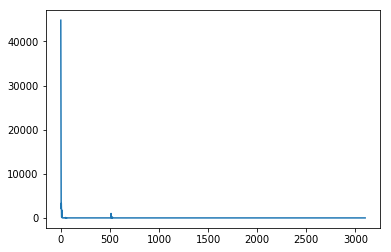

In [97]:
# Best score: -0.024683598348430726 Best params:{'batch_size': 26, 'epochs': 3100}
model_fit(26,3100, X_train, y_log_train, X_test)

## y/10000

In [98]:
batch_size = [16, 24, 32, 48, 64]
epochs = [100,500,1000,1500,2000,2500,3000,3500]
y_1w_train = y_train.copy() / 10000
grid_serach(batch_size,epochs,X_train, y_1w_train)

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/3500
1168/1168 [==============================] - 2s 2ms/step - loss: 2206.3918
Epoch 2/3500
1168/1168 [==============================] - 0s 105us/step - loss: 425.2795
Epoch 3/3500
1168/1168 [==============================] - 0s 104us/step - loss: 407.6771
Epoch 4/3500
1168/1168 [==============================] - 0s 104us/step - loss: 389.7950
Epoch 5/3500
1168/1168 [==============================] - 0s 104us/step - loss: 384.4964
Epoch 6/3500
1168/1168 [==============================] - 0s 104us/step - loss: 374.4073
Epoch 7/3500
1168/1168 [==============================] - 0s 106us/step - loss: 376.9706
Epoch 8/3500
1168/1168 [==============================] - 0s 107us/step - loss: 363.5495
Epoch 9/3500
1168/1168 [==============================] - 0s 104us/step - loss: 379.0567
Epoch 10/3500
1168/1168 [==============================] - 0s 105us/step - loss: 371.2125
Epoch 11/3500
1168/1168 [==============================] - 0s 105us/step - loss: 355.0149
Epoch 12/3500
1168/1

1168/1168 [==============================] - 0s 106us/step - loss: 18.9813
Epoch 94/3500
1168/1168 [==============================] - 0s 106us/step - loss: 18.6996
Epoch 95/3500
1168/1168 [==============================] - 0s 105us/step - loss: 25.7593
Epoch 96/3500
1168/1168 [==============================] - 0s 104us/step - loss: 22.5765
Epoch 97/3500
1168/1168 [==============================] - 0s 106us/step - loss: 15.9698
Epoch 98/3500
1168/1168 [==============================] - 0s 105us/step - loss: 16.7009
Epoch 99/3500
1168/1168 [==============================] - 0s 106us/step - loss: 18.3113
Epoch 100/3500
1168/1168 [==============================] - 0s 106us/step - loss: 15.6201
Epoch 101/3500
1168/1168 [==============================] - 0s 105us/step - loss: 15.6427
Epoch 102/3500
1168/1168 [==============================] - 0s 105us/step - loss: 18.1991
Epoch 103/3500
1168/1168 [==============================] - 0s 105us/step - loss: 16.8964
Epoch 104/3500
1168/1168 [=====

1168/1168 [==============================] - 0s 97us/step - loss: 7.5916
Epoch 276/3500
1168/1168 [==============================] - 0s 97us/step - loss: 9.0730
Epoch 277/3500
1168/1168 [==============================] - 0s 97us/step - loss: 7.2836
Epoch 278/3500
1168/1168 [==============================] - 0s 96us/step - loss: 7.5186
Epoch 279/3500
1168/1168 [==============================] - 0s 97us/step - loss: 7.2785
Epoch 280/3500
1168/1168 [==============================] - 0s 98us/step - loss: 7.4110
Epoch 281/3500
1168/1168 [==============================] - 0s 101us/step - loss: 8.2489
Epoch 282/3500
1168/1168 [==============================] - 0s 98us/step - loss: 8.2817
Epoch 283/3500
1168/1168 [==============================] - 0s 99us/step - loss: 8.2080
Epoch 284/3500
1168/1168 [==============================] - 0s 99us/step - loss: 7.4600
Epoch 285/3500
1168/1168 [==============================] - 0s 103us/step - loss: 7.1589
Epoch 286/3500
1168/1168 [===================

1168/1168 [==============================] - 0s 105us/step - loss: 7.1078
Epoch 460/3500
1168/1168 [==============================] - 0s 105us/step - loss: 7.7466
Epoch 461/3500
1168/1168 [==============================] - 0s 105us/step - loss: 6.3963
Epoch 462/3500
1168/1168 [==============================] - 0s 105us/step - loss: 6.3016
Epoch 463/3500
1168/1168 [==============================] - 0s 105us/step - loss: 5.6272
Epoch 464/3500
1168/1168 [==============================] - 0s 105us/step - loss: 5.8765
Epoch 465/3500
1168/1168 [==============================] - 0s 105us/step - loss: 5.9960
Epoch 466/3500
1168/1168 [==============================] - 0s 106us/step - loss: 5.5937
Epoch 467/3500
1168/1168 [==============================] - 0s 109us/step - loss: 5.4995
Epoch 468/3500
1168/1168 [==============================] - 0s 106us/step - loss: 5.9489
Epoch 469/3500
1168/1168 [==============================] - 0s 106us/step - loss: 5.4420
Epoch 470/3500
1168/1168 [==========

1168/1168 [==============================] - 0s 102us/step - loss: 4.8296
Epoch 644/3500
1168/1168 [==============================] - 0s 103us/step - loss: 5.9385
Epoch 645/3500
1168/1168 [==============================] - 0s 104us/step - loss: 4.5380
Epoch 646/3500
1168/1168 [==============================] - 0s 104us/step - loss: 4.1179
Epoch 647/3500
1168/1168 [==============================] - 0s 104us/step - loss: 4.5368
Epoch 648/3500
1168/1168 [==============================] - 0s 104us/step - loss: 6.1097
Epoch 649/3500
1168/1168 [==============================] - 0s 104us/step - loss: 4.7908
Epoch 650/3500
1168/1168 [==============================] - 0s 102us/step - loss: 4.6415
Epoch 651/3500
1168/1168 [==============================] - 0s 106us/step - loss: 5.7587
Epoch 652/3500
1168/1168 [==============================] - 0s 108us/step - loss: 4.1846
Epoch 653/3500
1168/1168 [==============================] - 0s 105us/step - loss: 4.4416
Epoch 654/3500
1168/1168 [==========

1168/1168 [==============================] - 0s 105us/step - loss: 4.9773
Epoch 828/3500
1168/1168 [==============================] - 0s 104us/step - loss: 4.0444
Epoch 829/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.8300
Epoch 830/3500
1168/1168 [==============================] - 0s 111us/step - loss: 3.6253
Epoch 831/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.6200
Epoch 832/3500
1168/1168 [==============================] - 0s 105us/step - loss: 4.7538
Epoch 833/3500
1168/1168 [==============================] - 0s 105us/step - loss: 5.1280
Epoch 834/3500
1168/1168 [==============================] - 0s 105us/step - loss: 4.7730
Epoch 835/3500
1168/1168 [==============================] - 0s 105us/step - loss: 4.4065
Epoch 836/3500
1168/1168 [==============================] - 0s 106us/step - loss: 4.2146
Epoch 837/3500
1168/1168 [==============================] - 0s 109us/step - loss: 4.5125
Epoch 838/3500
1168/1168 [==========

1168/1168 [==============================] - 0s 103us/step - loss: 3.5431
Epoch 1012/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.6667
Epoch 1013/3500
1168/1168 [==============================] - 0s 104us/step - loss: 4.2393
Epoch 1014/3500
1168/1168 [==============================] - 0s 103us/step - loss: 3.8001
Epoch 1015/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.9436
Epoch 1016/3500
1168/1168 [==============================] - 0s 105us/step - loss: 4.8998
Epoch 1017/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.7782
Epoch 1018/3500
1168/1168 [==============================] - 0s 103us/step - loss: 4.7346
Epoch 1019/3500
1168/1168 [==============================] - 0s 103us/step - loss: 3.7585
Epoch 1020/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.4758
Epoch 1021/3500
1168/1168 [==============================] - 0s 106us/step - loss: 3.5560
Epoch 1022/3500
1168/1168 

1168/1168 [==============================] - 0s 105us/step - loss: 3.6420
Epoch 1194/3500
1168/1168 [==============================] - 0s 108us/step - loss: 3.7635
Epoch 1195/3500
1168/1168 [==============================] - 0s 108us/step - loss: 3.8880
Epoch 1196/3500
1168/1168 [==============================] - 0s 108us/step - loss: 3.4711
Epoch 1197/3500
1168/1168 [==============================] - 0s 107us/step - loss: 3.5007
Epoch 1198/3500
1168/1168 [==============================] - 0s 106us/step - loss: 3.4117
Epoch 1199/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.4368
Epoch 1200/3500
1168/1168 [==============================] - 0s 107us/step - loss: 3.2788
Epoch 1201/3500
1168/1168 [==============================] - 0s 106us/step - loss: 4.0304
Epoch 1202/3500
1168/1168 [==============================] - 0s 106us/step - loss: 4.5212
Epoch 1203/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.4611
Epoch 1204/3500
1168/1168 

1168/1168 [==============================] - 0s 104us/step - loss: 3.9887
Epoch 1376/3500
1168/1168 [==============================] - 0s 106us/step - loss: 3.3054
Epoch 1377/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.7026
Epoch 1378/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.3034
Epoch 1379/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.1787
Epoch 1380/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.4259
Epoch 1381/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.1753
Epoch 1382/3500
1168/1168 [==============================] - 0s 103us/step - loss: 3.6037
Epoch 1383/3500
1168/1168 [==============================] - 0s 106us/step - loss: 3.5603
Epoch 1384/3500
1168/1168 [==============================] - 0s 103us/step - loss: 4.4897
Epoch 1385/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.7087
Epoch 1386/3500
1168/1168 

1168/1168 [==============================] - 0s 107us/step - loss: 3.1072
Epoch 1558/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.3650
Epoch 1559/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.7340
Epoch 1560/3500
1168/1168 [==============================] - 0s 106us/step - loss: 3.3602
Epoch 1561/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.0489
Epoch 1562/3500
1168/1168 [==============================] - 0s 106us/step - loss: 3.0623
Epoch 1563/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.8759
Epoch 1564/3500
1168/1168 [==============================] - 0s 106us/step - loss: 3.6955
Epoch 1565/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.2766
Epoch 1566/3500
1168/1168 [==============================] - 0s 106us/step - loss: 3.2367
Epoch 1567/3500
1168/1168 [==============================] - 0s 107us/step - loss: 3.4237
Epoch 1568/3500
1168/1168 

1168/1168 [==============================] - 0s 104us/step - loss: 3.3173
Epoch 1740/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.1573
Epoch 1741/3500
1168/1168 [==============================] - 0s 107us/step - loss: 3.0588
Epoch 1742/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.0107
Epoch 1743/3500
1168/1168 [==============================] - 0s 106us/step - loss: 3.0494
Epoch 1744/3500
1168/1168 [==============================] - 0s 110us/step - loss: 3.0956
Epoch 1745/3500
1168/1168 [==============================] - 0s 106us/step - loss: 2.7631
Epoch 1746/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.2660
Epoch 1747/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.0220
Epoch 1748/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.8580
Epoch 1749/3500
1168/1168 [==============================] - 0s 107us/step - loss: 3.4856
Epoch 1750/3500
1168/1168 

1168/1168 [==============================] - 0s 107us/step - loss: 3.8482
Epoch 1922/3500
1168/1168 [==============================] - 0s 107us/step - loss: 2.8482
Epoch 1923/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.1928
Epoch 1924/3500
1168/1168 [==============================] - 0s 106us/step - loss: 2.9356
Epoch 1925/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.9622
Epoch 1926/3500
1168/1168 [==============================] - 0s 106us/step - loss: 4.4172
Epoch 1927/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.1117
Epoch 1928/3500
1168/1168 [==============================] - 0s 106us/step - loss: 3.1463
Epoch 1929/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.1488
Epoch 1930/3500
1168/1168 [==============================] - 0s 104us/step - loss: 2.7223
Epoch 1931/3500
1168/1168 [==============================] - 0s 109us/step - loss: 2.7773
Epoch 1932/3500
1168/1168 

1168/1168 [==============================] - 0s 105us/step - loss: 2.8145
Epoch 2104/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.1078
Epoch 2105/3500
1168/1168 [==============================] - 0s 103us/step - loss: 3.1080
Epoch 2106/3500
1168/1168 [==============================] - 0s 103us/step - loss: 3.3842
Epoch 2107/3500
1168/1168 [==============================] - 0s 106us/step - loss: 2.5887
Epoch 2108/3500
1168/1168 [==============================] - 0s 108us/step - loss: 3.0890
Epoch 2109/3500
1168/1168 [==============================] - 0s 107us/step - loss: 3.0339
Epoch 2110/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.8026
Epoch 2111/3500
1168/1168 [==============================] - 0s 106us/step - loss: 2.7721
Epoch 2112/3500
1168/1168 [==============================] - 0s 106us/step - loss: 2.9619
Epoch 2113/3500
1168/1168 [==============================] - 0s 104us/step - loss: 2.8938
Epoch 2114/3500
1168/1168 

1168/1168 [==============================] - 0s 105us/step - loss: 3.3238
Epoch 2286/3500
1168/1168 [==============================] - 0s 104us/step - loss: 2.8291
Epoch 2287/3500
1168/1168 [==============================] - 0s 106us/step - loss: 3.1267
Epoch 2288/3500
1168/1168 [==============================] - 0s 106us/step - loss: 2.8646
Epoch 2289/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.1689
Epoch 2290/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.5610
Epoch 2291/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.8754
Epoch 2292/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.5894
Epoch 2293/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.1365
Epoch 2294/3500
1168/1168 [==============================] - 0s 103us/step - loss: 3.0498
Epoch 2295/3500
1168/1168 [==============================] - 0s 104us/step - loss: 2.6722
Epoch 2296/3500
1168/1168 

1168/1168 [==============================] - 0s 103us/step - loss: 3.4498
Epoch 2468/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.5701
Epoch 2469/3500
1168/1168 [==============================] - 0s 104us/step - loss: 2.6957
Epoch 2470/3500
1168/1168 [==============================] - 0s 103us/step - loss: 2.5294
Epoch 2471/3500
1168/1168 [==============================] - 0s 106us/step - loss: 3.0848
Epoch 2472/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.3059
Epoch 2473/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.2589
Epoch 2474/3500
1168/1168 [==============================] - 0s 103us/step - loss: 2.8965
Epoch 2475/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.3887
Epoch 2476/3500
1168/1168 [==============================] - 0s 104us/step - loss: 2.7522
Epoch 2477/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.8638
Epoch 2478/3500
1168/1168 

1168/1168 [==============================] - 0s 107us/step - loss: 3.2257
Epoch 2650/3500
1168/1168 [==============================] - 0s 106us/step - loss: 2.6474
Epoch 2651/3500
1168/1168 [==============================] - 0s 106us/step - loss: 4.0311
Epoch 2652/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.1796
Epoch 2653/3500
1168/1168 [==============================] - 0s 107us/step - loss: 3.2846
Epoch 2654/3500
1168/1168 [==============================] - 0s 107us/step - loss: 2.8615
Epoch 2655/3500
1168/1168 [==============================] - 0s 106us/step - loss: 2.6909
Epoch 2656/3500
1168/1168 [==============================] - 0s 106us/step - loss: 2.5540
Epoch 2657/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.4576
Epoch 2658/3500
1168/1168 [==============================] - 0s 104us/step - loss: 2.3792
Epoch 2659/3500
1168/1168 [==============================] - 0s 111us/step - loss: 2.4046
Epoch 2660/3500
1168/1168 

1168/1168 [==============================] - 0s 105us/step - loss: 2.7554
Epoch 2832/3500
1168/1168 [==============================] - 0s 104us/step - loss: 3.7851
Epoch 2833/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.8764
Epoch 2834/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.7489
Epoch 2835/3500
1168/1168 [==============================] - 0s 103us/step - loss: 3.3211
Epoch 2836/3500
1168/1168 [==============================] - 0s 109us/step - loss: 2.9100
Epoch 2837/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.6946
Epoch 2838/3500
1168/1168 [==============================] - 0s 106us/step - loss: 3.0913
Epoch 2839/3500
1168/1168 [==============================] - 0s 106us/step - loss: 3.1849
Epoch 2840/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.4212
Epoch 2841/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.1133
Epoch 2842/3500
1168/1168 

1168/1168 [==============================] - 0s 105us/step - loss: 2.7260
Epoch 3014/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.8098
Epoch 3015/3500
1168/1168 [==============================] - 0s 103us/step - loss: 2.4887
Epoch 3016/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.3673
Epoch 3017/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.6098
Epoch 3018/3500
1168/1168 [==============================] - 0s 106us/step - loss: 2.7782
Epoch 3019/3500
1168/1168 [==============================] - 0s 106us/step - loss: 2.9433
Epoch 3020/3500
1168/1168 [==============================] - 0s 103us/step - loss: 2.5695
Epoch 3021/3500
1168/1168 [==============================] - 0s 104us/step - loss: 2.7635
Epoch 3022/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.7651
Epoch 3023/3500
1168/1168 [==============================] - 0s 105us/step - loss: 3.8947
Epoch 3024/3500
1168/1168 

1168/1168 [==============================] - 0s 105us/step - loss: 3.8457
Epoch 3196/3500
1168/1168 [==============================] - 0s 106us/step - loss: 3.0646
Epoch 3197/3500
1168/1168 [==============================] - 0s 108us/step - loss: 3.1458
Epoch 3198/3500
1168/1168 [==============================] - 0s 107us/step - loss: 2.6353
Epoch 3199/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.5002
Epoch 3200/3500
1168/1168 [==============================] - 0s 106us/step - loss: 2.4146
Epoch 3201/3500
1168/1168 [==============================] - 0s 107us/step - loss: 2.3519
Epoch 3202/3500
1168/1168 [==============================] - 0s 106us/step - loss: 2.4663
Epoch 3203/3500
1168/1168 [==============================] - 0s 107us/step - loss: 2.9784
Epoch 3204/3500
1168/1168 [==============================] - 0s 108us/step - loss: 2.7415
Epoch 3205/3500
1168/1168 [==============================] - 0s 106us/step - loss: 2.5423
Epoch 3206/3500
1168/1168 

1168/1168 [==============================] - 0s 107us/step - loss: 2.6392
Epoch 3378/3500
1168/1168 [==============================] - 0s 106us/step - loss: 2.4559
Epoch 3379/3500
1168/1168 [==============================] - 0s 106us/step - loss: 3.6568
Epoch 3380/3500
1168/1168 [==============================] - 0s 108us/step - loss: 2.9221
Epoch 3381/3500
1168/1168 [==============================] - 0s 105us/step - loss: 2.8859
Epoch 3382/3500
1168/1168 [==============================] - 0s 109us/step - loss: 2.5083
Epoch 3383/3500
1168/1168 [==============================] - 0s 107us/step - loss: 2.8414
Epoch 3384/3500
1168/1168 [==============================] - 0s 106us/step - loss: 3.4498
Epoch 3385/3500
1168/1168 [==============================] - 0s 107us/step - loss: 2.5368
Epoch 3386/3500
1168/1168 [==============================] - 0s 106us/step - loss: 2.6410
Epoch 3387/3500
1168/1168 [==============================] - 0s 107us/step - loss: 3.0859
Epoch 3388/3500
1168/1168 

In [100]:
# Best score: -11.941665561231849 Best params:{'batch_size': 16, 'epochs': 3500}
def model_fit(batch_size, epochs, X_train, y_train, X_test):
    model = create_model()

    start_time = time.time()
    history = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=0)
    end_time = time.time()
    print("Cost time: {} s".format(end_time - start_time))

    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred*10000))
    logrmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(pred*10000)))
    print("RMSE: {} \nLOGRMSE: {}".format(rmse, logrmse))
    
    plt.plot(history.history['loss'])

Cost time: 428.3615665435791 s
RMSE: 26924.124620416955 
LOGRMSE: 0.13475838248227512


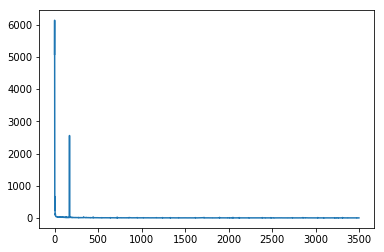

In [102]:
batch_size = 16
epochs = 3500
model_fit(batch_size, epochs, X_train, y_1w_train, X_test)

In [103]:
batch_size = [14,16,18,20]
epochs = [3000,3100,3200,3300,3400,3500,3600,3700,3800,3900,4000]
y_1w_train = y_train.copy() / 10000
grid_serach(batch_size,epochs,X_train, y_1w_train)

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/4000
1168/1168 [==============================] - 3s 2ms/step - loss: 91709.6958
Epoch 2/4000
1168/1168 [==============================] - 0s 100us/step - loss: 11498.1540
Epoch 3/4000
1168/1168 [==============================] - 0s 101us/step - loss: 22014.5265
Epoch 4/4000
1168/1168 [==============================] - 0s 98us/step - loss: 15206.1529
Epoch 5/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3928.9838
Epoch 6/4000
1168/1168 [==============================] - 0s 99us/step - loss: 5369.9893
Epoch 7/4000
1168/1168 [==============================] - 0s 100us/step - loss: 1892.8024
Epoch 8/4000
1168/1168 [==============================] - 0s 101us/step - loss: 2950.6743
Epoch 9/4000
1168/1168 [==============================] - 0s 100us/step - loss: 568.6410
Epoch 10/4000
1168/1168 [==============================] - 0s 99us/step - loss: 348.5912
Epoch 11/4000
1168/1168 [==============================] - 0s 100us/step - loss: 353.0561
Epoch 12/400

Epoch 93/4000
1168/1168 [==============================] - 0s 100us/step - loss: 26.1500
Epoch 94/4000
1168/1168 [==============================] - 0s 100us/step - loss: 22.1411
Epoch 95/4000
1168/1168 [==============================] - 0s 100us/step - loss: 25.2270
Epoch 96/4000
1168/1168 [==============================] - 0s 100us/step - loss: 23.1575
Epoch 97/4000
1168/1168 [==============================] - 0s 100us/step - loss: 24.7661
Epoch 98/4000
1168/1168 [==============================] - 0s 101us/step - loss: 22.5748
Epoch 99/4000
1168/1168 [==============================] - 0s 100us/step - loss: 21.0323
Epoch 100/4000
1168/1168 [==============================] - 0s 100us/step - loss: 25.6510
Epoch 101/4000
1168/1168 [==============================] - 0s 100us/step - loss: 24.8109
Epoch 102/4000
1168/1168 [==============================] - 0s 105us/step - loss: 23.0081
Epoch 103/4000
1168/1168 [==============================] - 0s 100us/step - loss: 24.2528
Epoch 104/4000
11

1168/1168 [==============================] - 0s 100us/step - loss: 10.7596
Epoch 277/4000
1168/1168 [==============================] - 0s 100us/step - loss: 11.4013
Epoch 278/4000
1168/1168 [==============================] - 0s 100us/step - loss: 10.1000
Epoch 279/4000
1168/1168 [==============================] - 0s 101us/step - loss: 11.6332
Epoch 280/4000
1168/1168 [==============================] - 0s 101us/step - loss: 12.3178
Epoch 281/4000
1168/1168 [==============================] - 0s 100us/step - loss: 10.1603
Epoch 282/4000
1168/1168 [==============================] - 0s 100us/step - loss: 14.4046
Epoch 283/4000
1168/1168 [==============================] - 0s 100us/step - loss: 11.0355
Epoch 284/4000
1168/1168 [==============================] - 0s 99us/step - loss: 9.7967
Epoch 285/4000
1168/1168 [==============================] - 0s 100us/step - loss: 9.5183
Epoch 286/4000
1168/1168 [==============================] - 0s 100us/step - loss: 8.7024
Epoch 287/4000
1168/1168 [===

1168/1168 [==============================] - 0s 105us/step - loss: 8.0174
Epoch 369/4000
1168/1168 [==============================] - 0s 103us/step - loss: 8.0248
Epoch 370/4000
1168/1168 [==============================] - 0s 102us/step - loss: 8.1800
Epoch 371/4000
1168/1168 [==============================] - 0s 103us/step - loss: 8.2850
Epoch 372/4000
1168/1168 [==============================] - 0s 102us/step - loss: 8.0020
Epoch 373/4000
1168/1168 [==============================] - 0s 104us/step - loss: 8.6703
Epoch 374/4000
1168/1168 [==============================] - 0s 104us/step - loss: 8.7610
Epoch 375/4000
1168/1168 [==============================] - 0s 116us/step - loss: 8.6136
Epoch 376/4000
1168/1168 [==============================] - 0s 104us/step - loss: 9.3714
Epoch 377/4000
1168/1168 [==============================] - 0s 105us/step - loss: 7.6294
Epoch 378/4000
1168/1168 [==============================] - 0s 105us/step - loss: 8.1850
Epoch 379/4000
1168/1168 [==========

1168/1168 [==============================] - 0s 100us/step - loss: 6.0698
Epoch 553/4000
1168/1168 [==============================] - 0s 99us/step - loss: 5.6785
Epoch 554/4000
1168/1168 [==============================] - 0s 100us/step - loss: 5.9110
Epoch 555/4000
1168/1168 [==============================] - 0s 101us/step - loss: 5.9216
Epoch 556/4000
1168/1168 [==============================] - 0s 99us/step - loss: 5.8277
Epoch 557/4000
1168/1168 [==============================] - 0s 99us/step - loss: 6.4814
Epoch 558/4000
1168/1168 [==============================] - 0s 99us/step - loss: 5.2975
Epoch 559/4000
1168/1168 [==============================] - 0s 99us/step - loss: 5.7419
Epoch 560/4000
1168/1168 [==============================] - 0s 100us/step - loss: 6.4237
Epoch 561/4000
1168/1168 [==============================] - 0s 100us/step - loss: 8.3659
Epoch 562/4000
1168/1168 [==============================] - 0s 98us/step - loss: 5.2227
Epoch 563/4000
1168/1168 [================

1168/1168 [==============================] - 0s 101us/step - loss: 5.9754
Epoch 737/4000
1168/1168 [==============================] - 0s 102us/step - loss: 5.6582
Epoch 738/4000
1168/1168 [==============================] - 0s 101us/step - loss: 5.0412
Epoch 739/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.7184
Epoch 740/4000
1168/1168 [==============================] - 0s 100us/step - loss: 5.3713
Epoch 741/4000
1168/1168 [==============================] - 0s 101us/step - loss: 5.1711
Epoch 742/4000
1168/1168 [==============================] - 0s 101us/step - loss: 5.0701
Epoch 743/4000
1168/1168 [==============================] - 0s 99us/step - loss: 4.7875
Epoch 744/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.7993
Epoch 745/4000
1168/1168 [==============================] - 0s 101us/step - loss: 4.7555
Epoch 746/4000
1168/1168 [==============================] - 0s 104us/step - loss: 5.1192
Epoch 747/4000
1168/1168 [===========

1168/1168 [==============================] - 0s 102us/step - loss: 6.0238
Epoch 921/4000
1168/1168 [==============================] - 0s 100us/step - loss: 5.2569
Epoch 922/4000
1168/1168 [==============================] - 0s 101us/step - loss: 4.3385
Epoch 923/4000
1168/1168 [==============================] - 0s 101us/step - loss: 5.2439
Epoch 924/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.8356
Epoch 925/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.5890
Epoch 926/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.6998
Epoch 927/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.2365
Epoch 928/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.8762
Epoch 929/4000
1168/1168 [==============================] - 0s 100us/step - loss: 5.0551
Epoch 930/4000
1168/1168 [==============================] - 0s 101us/step - loss: 4.5549
Epoch 931/4000
1168/1168 [==========

1168/1168 [==============================] - 0s 100us/step - loss: 5.1350
Epoch 1104/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.7847
Epoch 1105/4000
1168/1168 [==============================] - 0s 99us/step - loss: 4.6228
Epoch 1106/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.6862
Epoch 1107/4000
1168/1168 [==============================] - 0s 99us/step - loss: 5.0669
Epoch 1108/4000
1168/1168 [==============================] - 0s 98us/step - loss: 4.0284
Epoch 1109/4000
1168/1168 [==============================] - 0s 98us/step - loss: 4.7878
Epoch 1110/4000
1168/1168 [==============================] - 0s 99us/step - loss: 4.3412
Epoch 1111/4000
1168/1168 [==============================] - 0s 98us/step - loss: 4.1636
Epoch 1112/4000
1168/1168 [==============================] - 0s 98us/step - loss: 5.6913
Epoch 1113/4000
1168/1168 [==============================] - 0s 99us/step - loss: 4.3301
Epoch 1114/4000
1168/1168 [========

Epoch 1195/4000
1168/1168 [==============================] - 0s 102us/step - loss: 4.4956
Epoch 1196/4000
1168/1168 [==============================] - 0s 103us/step - loss: 4.8881
Epoch 1197/4000
1168/1168 [==============================] - 0s 104us/step - loss: 4.9756
Epoch 1198/4000
1168/1168 [==============================] - 0s 102us/step - loss: 4.2482
Epoch 1199/4000
1168/1168 [==============================] - 0s 103us/step - loss: 4.2780
Epoch 1200/4000
1168/1168 [==============================] - 0s 101us/step - loss: 4.3536
Epoch 1201/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.5911
Epoch 1202/4000
1168/1168 [==============================] - 0s 101us/step - loss: 4.2748
Epoch 1203/4000
1168/1168 [==============================] - 0s 99us/step - loss: 6.1227
Epoch 1204/4000
1168/1168 [==============================] - 0s 99us/step - loss: 4.4084
Epoch 1205/4000
1168/1168 [==============================] - 0s 99us/step - loss: 4.2786
Epoch 1206/40

1168/1168 [==============================] - 0s 99us/step - loss: 4.4107
Epoch 1378/4000
1168/1168 [==============================] - 0s 99us/step - loss: 4.0605
Epoch 1379/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.9703
Epoch 1380/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.4193
Epoch 1381/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.2442
Epoch 1382/4000
1168/1168 [==============================] - 0s 99us/step - loss: 4.7915
Epoch 1383/4000
1168/1168 [==============================] - 0s 100us/step - loss: 5.1544
Epoch 1384/4000
1168/1168 [==============================] - 0s 99us/step - loss: 4.6317
Epoch 1385/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.4477
Epoch 1386/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.1689
Epoch 1387/4000
1168/1168 [==============================] - 0s 99us/step - loss: 4.4015
Epoch 1388/4000
1168/1168 [====

1168/1168 [==============================] - 0s 98us/step - loss: 3.5506
Epoch 1560/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.3039
Epoch 1561/4000
1168/1168 [==============================] - 0s 101us/step - loss: 3.3341
Epoch 1562/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.7933
Epoch 1563/4000
1168/1168 [==============================] - 0s 98us/step - loss: 3.6847
Epoch 1564/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.4616
Epoch 1565/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.5450
Epoch 1566/4000
1168/1168 [==============================] - 0s 98us/step - loss: 3.7860
Epoch 1567/4000
1168/1168 [==============================] - 0s 98us/step - loss: 3.6896
Epoch 1568/4000
1168/1168 [==============================] - 0s 101us/step - loss: 3.9978
Epoch 1569/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.1273
Epoch 1570/4000
1168/1168 [======

Epoch 1651/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.6557
Epoch 1652/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.7235
Epoch 1653/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.3626
Epoch 1654/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.8489
Epoch 1655/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.4740
Epoch 1656/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.9738
Epoch 1657/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.9089
Epoch 1658/4000
1168/1168 [==============================] - 0s 98us/step - loss: 4.4858
Epoch 1659/4000
1168/1168 [==============================] - 0s 102us/step - loss: 3.4625
Epoch 1660/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.4083
Epoch 1661/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.7669
Epoch 1662/4000
1

1168/1168 [==============================] - 0s 100us/step - loss: 2.9523
Epoch 1834/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.4266
Epoch 1835/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.1179
Epoch 1836/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.2839
Epoch 1837/4000
1168/1168 [==============================] - 0s 100us/step - loss: 2.9767
Epoch 1838/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.0063
Epoch 1839/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.3178
Epoch 1840/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.3924
Epoch 1841/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.9489
Epoch 1842/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.3524
Epoch 1843/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.4187
Epoch 1844/4000
1168/1168 [====

Epoch 2016/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.0185
Epoch 2017/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.7468
Epoch 2018/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.3917
Epoch 2019/4000
1168/1168 [==============================] - 0s 97us/step - loss: 3.0167
Epoch 2020/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.0781
Epoch 2021/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.0773
Epoch 2022/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.2703
Epoch 2023/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.1558
Epoch 2024/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.4311
Epoch 2025/4000
1168/1168 [==============================] - 0s 98us/step - loss: 3.4060
Epoch 2026/4000
1168/1168 [==============================] - 0s 98us/step - loss: 3.1355
Epoch 2027/4000
1

1168/1168 [==============================] - 0s 99us/step - loss: 3.0933
Epoch 2199/4000
1168/1168 [==============================] - 0s 102us/step - loss: 3.0474
Epoch 2200/4000
1168/1168 [==============================] - 0s 101us/step - loss: 3.6512
Epoch 2201/4000
1168/1168 [==============================] - 0s 101us/step - loss: 3.1581
Epoch 2202/4000
1168/1168 [==============================] - 0s 102us/step - loss: 3.5067
Epoch 2203/4000
1168/1168 [==============================] - 0s 101us/step - loss: 4.2093
Epoch 2204/4000
1168/1168 [==============================] - 0s 102us/step - loss: 3.7096
Epoch 2205/4000
1168/1168 [==============================] - 0s 100us/step - loss: 2.8944
Epoch 2206/4000
1168/1168 [==============================] - 0s 103us/step - loss: 3.4091
Epoch 2207/4000
1168/1168 [==============================] - 0s 101us/step - loss: 5.4363
Epoch 2208/4000
1168/1168 [==============================] - 0s 101us/step - loss: 3.1955
Epoch 2209/4000
1168/1168 [

1168/1168 [==============================] - 0s 98us/step - loss: 4.5454
Epoch 2381/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.2763
Epoch 2382/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.0760
Epoch 2383/4000
1168/1168 [==============================] - 0s 101us/step - loss: 2.9127
Epoch 2384/4000
1168/1168 [==============================] - 0s 101us/step - loss: 3.2215
Epoch 2385/4000
1168/1168 [==============================] - 0s 101us/step - loss: 2.9351
Epoch 2386/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.2419
Epoch 2387/4000
1168/1168 [==============================] - 0s 98us/step - loss: 3.2117
Epoch 2388/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.2238
Epoch 2389/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.8105
Epoch 2390/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.3989
Epoch 2391/4000
1168/1168 [===

1168/1168 [==============================] - 0s 99us/step - loss: 3.0335
Epoch 2563/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.3319
Epoch 2564/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.0099
Epoch 2565/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.2262
Epoch 2566/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.3396
Epoch 2567/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.9632
Epoch 2568/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.0292
Epoch 2569/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.3590
Epoch 2570/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.9756
Epoch 2571/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.2195
Epoch 2572/4000
1168/1168 [==============================] - 0s 100us/step - loss: 2.8644
Epoch 2573/4000
1168/1168 [=====

1168/1168 [==============================] - 0s 103us/step - loss: 2.6156
Epoch 2745/4000
1168/1168 [==============================] - 0s 103us/step - loss: 3.0927
Epoch 2746/4000
1168/1168 [==============================] - 0s 102us/step - loss: 3.7810
Epoch 2747/4000
1168/1168 [==============================] - 0s 102us/step - loss: 3.0129
Epoch 2748/4000
1168/1168 [==============================] - 0s 102us/step - loss: 3.1312
Epoch 2749/4000
1168/1168 [==============================] - 0s 112us/step - loss: 3.2216
Epoch 2750/4000
1168/1168 [==============================] - 0s 102us/step - loss: 3.0529
Epoch 2751/4000
1168/1168 [==============================] - 0s 102us/step - loss: 2.9125
Epoch 2752/4000
1168/1168 [==============================] - 0s 101us/step - loss: 2.9583
Epoch 2753/4000
1168/1168 [==============================] - 0s 104us/step - loss: 2.6810
Epoch 2754/4000
1168/1168 [==============================] - 0s 101us/step - loss: 3.2364
Epoch 2755/4000
1168/1168 

1168/1168 [==============================] - 0s 104us/step - loss: 2.8410
Epoch 2927/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.1857
Epoch 2928/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.9108
Epoch 2929/4000
1168/1168 [==============================] - 0s 100us/step - loss: 2.4881
Epoch 2930/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.0717
Epoch 2931/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.5034
Epoch 2932/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.0482
Epoch 2933/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.7256
Epoch 2934/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.7839
Epoch 2935/4000
1168/1168 [==============================] - 0s 102us/step - loss: 2.6836
Epoch 2936/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.7737
Epoch 2937/4000
1168/1168 [====

Epoch 3018/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.1082
Epoch 3019/4000
1168/1168 [==============================] - 0s 98us/step - loss: 2.7294
Epoch 3020/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.6343
Epoch 3021/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.7249
Epoch 3022/4000
1168/1168 [==============================] - 0s 102us/step - loss: 2.8152
Epoch 3023/4000
1168/1168 [==============================] - 0s 100us/step - loss: 2.5432
Epoch 3024/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.7512
Epoch 3025/4000
1168/1168 [==============================] - 0s 98us/step - loss: 2.7044
Epoch 3026/4000
1168/1168 [==============================] - 0s 100us/step - loss: 2.9806
Epoch 3027/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.8287
Epoch 3028/4000
1168/1168 [==============================] - 0s 98us/step - loss: 2.4516
Epoch 3029/4000
11

1168/1168 [==============================] - 0s 98us/step - loss: 2.9225
Epoch 3201/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.8321
Epoch 3202/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.6934
Epoch 3203/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.8032
Epoch 3204/4000
1168/1168 [==============================] - 0s 104us/step - loss: 2.7706
Epoch 3205/4000
1168/1168 [==============================] - 0s 100us/step - loss: 2.8089
Epoch 3206/4000
1168/1168 [==============================] - 0s 97us/step - loss: 3.2361
Epoch 3207/4000
1168/1168 [==============================] - 0s 98us/step - loss: 3.8139
Epoch 3208/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.0522
Epoch 3209/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.6544
Epoch 3210/4000
1168/1168 [==============================] - 0s 98us/step - loss: 3.0755
Epoch 3211/4000
1168/1168 [======

1168/1168 [==============================] - 0s 100us/step - loss: 2.6764
Epoch 3383/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.9538
Epoch 3384/4000
1168/1168 [==============================] - 0s 100us/step - loss: 2.6223
Epoch 3385/4000
1168/1168 [==============================] - 0s 103us/step - loss: 3.2082
Epoch 3386/4000
1168/1168 [==============================] - 0s 101us/step - loss: 3.2670
Epoch 3387/4000
1168/1168 [==============================] - 0s 100us/step - loss: 2.9834
Epoch 3388/4000
1168/1168 [==============================] - 0s 100us/step - loss: 2.6011
Epoch 3389/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.1550
Epoch 3390/4000
1168/1168 [==============================] - 0s 100us/step - loss: 2.8769
Epoch 3391/4000
1168/1168 [==============================] - 0s 101us/step - loss: 2.7651
Epoch 3392/4000
1168/1168 [==============================] - 0s 100us/step - loss: 2.6748
Epoch 3393/4000
1168/1168 [

1168/1168 [==============================] - 0s 101us/step - loss: 3.1432
Epoch 3565/4000
1168/1168 [==============================] - 0s 98us/step - loss: 2.5109
Epoch 3566/4000
1168/1168 [==============================] - 0s 100us/step - loss: 2.5266
Epoch 3567/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.8335
Epoch 3568/4000
1168/1168 [==============================] - 0s 100us/step - loss: 2.4164
Epoch 3569/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.8550
Epoch 3570/4000
1168/1168 [==============================] - 0s 97us/step - loss: 2.9196
Epoch 3571/4000
1168/1168 [==============================] - 0s 98us/step - loss: 2.6002
Epoch 3572/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.9419
Epoch 3573/4000
1168/1168 [==============================] - 0s 98us/step - loss: 2.5556
Epoch 3574/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.9917
Epoch 3575/4000
1168/1168 [=======

1168/1168 [==============================] - 0s 98us/step - loss: 2.3906
Epoch 3657/4000
1168/1168 [==============================] - 0s 98us/step - loss: 2.4521
Epoch 3658/4000
1168/1168 [==============================] - 0s 98us/step - loss: 3.0428
Epoch 3659/4000
1168/1168 [==============================] - 0s 98us/step - loss: 2.9792
Epoch 3660/4000
1168/1168 [==============================] - 0s 98us/step - loss: 2.8535
Epoch 3661/4000
1168/1168 [==============================] - 0s 98us/step - loss: 2.7669
Epoch 3662/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.7018
Epoch 3663/4000
1168/1168 [==============================] - 0s 100us/step - loss: 4.8752
Epoch 3664/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.0523
Epoch 3665/4000
1168/1168 [==============================] - 0s 98us/step - loss: 3.9405
Epoch 3666/4000
1168/1168 [==============================] - 0s 98us/step - loss: 2.7139
Epoch 3667/4000
1168/1168 [=========

1168/1168 [==============================] - 0s 104us/step - loss: 4.5909
Epoch 3839/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.9042
Epoch 3840/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.3790
Epoch 3841/4000
1168/1168 [==============================] - 0s 98us/step - loss: 2.7758
Epoch 3842/4000
1168/1168 [==============================] - 0s 101us/step - loss: 4.0333
Epoch 3843/4000
1168/1168 [==============================] - 0s 100us/step - loss: 3.1728
Epoch 3844/4000
1168/1168 [==============================] - 0s 99us/step - loss: 3.1659
Epoch 3845/4000
1168/1168 [==============================] - 0s 100us/step - loss: 2.9820
Epoch 3846/4000
1168/1168 [==============================] - 0s 99us/step - loss: 2.5808
Epoch 3847/4000
1168/1168 [==============================] - 0s 98us/step - loss: 2.7452
Epoch 3848/4000
1168/1168 [==============================] - 0s 97us/step - loss: 2.8147
Epoch 3849/4000
1168/1168 [=====

Cost time: 454.1063060760498 s
RMSE: 29587.906302938387 
LOGRMSE: 0.14047120712006586


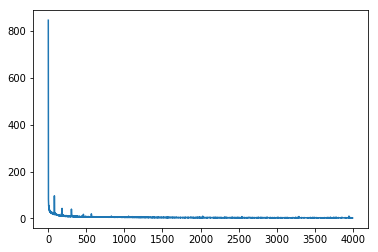

In [104]:
# Best score: -10.533358774160686 Best params:{'batch_size': 18, 'epochs': 4000}
batch_size = 18
epochs = 4000
model_fit(batch_size, epochs, X_train, y_1w_train, X_test)